<a href="https://colab.research.google.com/github/safarie1103/DSC680/blob/main/Project1-stock-market-technical-indicators/Code/stock-market-technical-indicators-visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Visualization

In [ ]:
# Import Modules
import os
import sys

import json
from pathlib import Path
import numpy as np
import pandas as pd
import os
import random
import copy
import matplotlib.pyplot as plt
import pandas

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
data_dir = Path('/content/drive/MyDrive/DataSets/')

Mounted at /content/drive


In [ ]:

data_dir = Path('D:/GitHub/dsc650/ExternalResources/stock-market-technical-indicators-visualization/data/')

## Read the data from Stock folder

### Check how much data is available? 

In [ ]:
from subprocess import check_output
print(check_output(["dir", ""]).decode("utf8"))

In [ ]:
 for root, dirs, files in os.walk(data_dir.joinpath('kv')):

SyntaxError: unexpected EOF while parsing (2253440642.py, line 1)

In [ ]:
os.chdir(data_dir.joinpath('Stocks'))
list = os.listdir()
number_files = len(list)
print(number_files)

7195


In [ ]:
os.chdir(data_dir.joinpath('ETFs'))
list = os.listdir()
number_files = len(list)
print(number_files)

1344


### Choose 8 random stock data for analysis

In [ ]:
#filenames = [x for x in os.listdir("./Stocks/") if x.endswith('.txt') and os.path.getsize(x) > 0]
os.chdir(data_dir.joinpath('Stocks'))
filenames = random.sample([x for x in os.listdir() if x.endswith('.txt') 
                           and os.path.getsize(os.path.join('',x)) > 0], 8)
print(filenames)

['trvn.us.txt', 'intx.us.txt', 'tse.us.txt', 'asix.us.txt', 'bgr.us.txt', 'dvp.us.txt', 'cog.us.txt', 'sbnb.us.txt']


### Read data into dataframes

In [ ]:
data = []
for filename in filenames:
    print(os.path.join('',filename))
    df = pd.read_csv(os.path.join('',filename), sep=',')
    label, _, _ = filename.split(sep='.')
    df['Label'] = label
    df['Date'] = pd.to_datetime(df['Date'])

    data.append(df)

trvn.us.txt
intx.us.txt
tse.us.txt
asix.us.txt
bgr.us.txt
dvp.us.txt
cog.us.txt
sbnb.us.txt


In [ ]:
data[0].head()

Date  Open    High   Low  Close   Volume  OpenInt Label
0 2014-01-31  7.11  7.2500  6.35   6.50  3135696        0  trvn
1 2014-02-03  6.50  6.7200  6.46   6.59    61119        0  trvn
2 2014-02-04  6.66  7.0000  6.50   6.58    48571        0  trvn
3 2014-02-05  6.87  7.2000  6.49   6.70   195383        0  trvn
4 2014-02-06  6.83  6.9399  6.50   6.89    68473        0  trvn

In [ ]:
data[1].head()

Date   Open   High    Low  Close   Volume  OpenInt Label
0 2017-11-08  28.00  29.78  27.20  28.71  1062305        0  cbtx
1 2017-11-09  28.52  28.98  28.25  28.45   200059        0  cbtx
2 2017-11-10  28.45  29.69  28.10  29.12    57573        0  cbtx

In [ ]:
print(len(data))

8


## Add various Technical Indicators in the dataframe

There are many types of Technical Indicators. 
The Technical Indicators we are considering are:
- RSI, Volume (plain), Bollinger Bands, Aroon, Price Volume Trend, acceleration bands
- Stochastic, Chaikin Money Flow, Parabolic SAR, Rate of Change, Volume weighted average Price, momentum
- Commodity Channel Index, On Balance Volume, Keltner Channels, Triple Exponential Moving Average, Normalized Averager True Range ,directional movement indicators
- MACD, Money flowindex , Ichimoku, William %R, Volume MINMAX, adaptive moving average

In [ ]:
TechIndicator = copy.deepcopy(data)

### Calculation of Relative Strength Index (RSI)

Benefit of day to day price

In [ ]:
# Relative Strength Index
# Avg(PriceUp)/(Avg(PriceUP)+Avg(PriceDown)*100
# Where: PriceUp(t)=1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)>0};
#        PriceDown(t)=-1*(Price(t)-Price(t-1)){Price(t)- Price(t-1)<0};

def rsi(values):
    up = values[values>0].mean()
    down = -1*values[values<0].mean()
    return 100 * up / (up + down)


In [ ]:
# Add Momentum_1D column for all 15 stocks.
# Momentum_1D = P(t) - P(t-1)
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum_1D'] = (TechIndicator[stock]['Close']-TechIndicator[stock]['Close'].shift(1)).fillna(0)
    TechIndicator[stock]['RSI_14D'] = TechIndicator[stock]['Momentum_1D'].rolling(center=False, window=14).apply(rsi).fillna(0)
TechIndicator[1].tail(5)

Date   Open   High    Low  Close   Volume  OpenInt Label  Momentum_1D  \
0 2017-11-08  28.00  29.78  27.20  28.71  1062305        0  cbtx         0.00   
1 2017-11-09  28.52  28.98  28.25  28.45   200059        0  cbtx        -0.26   
2 2017-11-10  28.45  29.69  28.10  29.12    57573        0  cbtx         0.67   

   RSI_14D  
0      0.0  
1      0.0  
2      0.0

In [ ]:
TechIndicator[1].head(5)

Date   Open   High    Low  Close   Volume  OpenInt Label  Momentum_1D  \
0 2017-11-08  28.00  29.78  27.20  28.71  1062305        0  cbtx         0.00   
1 2017-11-09  28.52  28.98  28.25  28.45   200059        0  cbtx        -0.26   
2 2017-11-10  28.45  29.69  28.10  29.12    57573        0  cbtx         0.67   

   RSI_14D  
0      0.0  
1      0.0  
2      0.0

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as px
import numpy as np

In [ ]:
TechIndicator[0]["Open"]

0       17.864
1       18.193
2       18.144
3       18.162
4       17.937
         ...  
3196    20.660
3197    20.620
3198    20.280
3199    20.220
3200    19.920
Name: Open, Length: 3201, dtype: float64

In [ ]:
TechIndicator[0]["Volume"]

0       314114
1       285207
2       368185
3       376849
4       397836
         ...  
3196    177558
3197    215886
3198    122016
3199    130483
3200     92534
Name: Volume, Length: 3201, dtype: int64

In [ ]:
fig = px.scatter(data_frame=TechIndicator[0],
           x='Volume', 
           log_x=True,
           title='Volume_plain',
           size='Volume',           
           animation_frame=TechIndicator[0].index,
           height=600,
           size_max=100
           )

In [ ]:
fig.show()

In [ ]:
### Calculation of Volume (Plain)m

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Volume_plain'] = TechIndicator[stock]['Volume'].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low  Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.98   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.87   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  27.02  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.87   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  26.79   21294        0  heem   

     Momentum_1D    RSI_14D  Volume_plain  
764         0.19  56.476684         27490  
765        -0.11  58.186398         13209  
766         0.15  63.157895        204261  
767        -0.15  63.636364         24243  
768        -0.08  61.764706         21294

### Calculation of Bollinger Bands

In [ ]:
def bbands(price, length=30, numsd=2):
    """ returns average, upper band, and lower band"""
    #ave = pd.stats.moments.rolling_mean(price,length)
    ave = price.rolling(window = length, center = False).mean()
    #sd = pd.stats.moments.rolling_std(price,length)
    sd = price.rolling(window = length, center = False).std()
    upband = ave + (sd*numsd)
    dnband = ave - (sd*numsd)
    return np.round(ave,3), np.round(upband,3), np.round(dnband,3)

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['BB_Middle_Band'], TechIndicator[stock]['BB_Upper_Band'], TechIndicator[stock]['BB_Lower_Band'] = bbands(TechIndicator[stock]['Close'], length=20, numsd=1)
    TechIndicator[stock]['BB_Middle_Band'] = TechIndicator[stock]['BB_Middle_Band'].fillna(0)
    TechIndicator[stock]['BB_Upper_Band'] = TechIndicator[stock]['BB_Upper_Band'].fillna(0)
    TechIndicator[stock]['BB_Lower_Band'] = TechIndicator[stock]['BB_Lower_Band'].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low  Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.98   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.87   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  27.02  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.87   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  26.79   21294        0  heem   

     Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  BB_Upper_Band  \
764         0.19  56.476684         27490          26.612         26.766   
765        -0.11  58.186398         13209          26.629         26.791   
766         0.15  63.157895        204261          26.649         26.834   
767        -0.15  63.636364         24243          26.662         26.853   
768        -0.08  61.764706         21294          26.667         26.859   

     BB_Lower_Band  
764         26.459  
765         26.466  
766         26.464  
767         26.472  
768         26.474

### Calculation of Aroon Oscillator

how strong is the trend

In [ ]:
def aroon(df, tf=25):
    aroonup = []
    aroondown = []
    x = tf
    while x< len(df['Date']):
        aroon_up = ((df['High'][x-tf:x].tolist().index(max(df['High'][x-tf:x])))/float(tf))*100
        aroon_down = ((df['Low'][x-tf:x].tolist().index(min(df['Low'][x-tf:x])))/float(tf))*100
        aroonup.append(aroon_up)
        aroondown.append(aroon_down)
        x+=1
    return aroonup, aroondown

In [ ]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 25
    up, down = aroon(TechIndicator[stock])
    aroon_list = [x - y for x, y in zip(up,down)]
    if len(aroon_list)==0:
        aroon_list = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Aroon_Oscillator'] = aroon_list
    else:
        TechIndicator[stock]['Aroon_Oscillator'] = listofzeros+aroon_list


### Calculation of Price Volume Trend

PVT = [((CurrentClose - PreviousClose) / PreviousClose) x Volume] + PreviousPVT

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]["PVT"] = (TechIndicator[stock]['Momentum_1D']/ TechIndicator[stock]['Close'].shift(1))*TechIndicator[stock]['Volume']
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"]+TechIndicator[stock]["PVT"].shift(1)
    TechIndicator[stock]["PVT"] = TechIndicator[stock]["PVT"].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low  Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.98   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.87   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  27.02  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.87   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  26.79   21294        0  heem   

     Momentum_1D    RSI_14D  Volume_plain  BB_Middle_Band  BB_Upper_Band  \
764         0.19  56.476684         27490          26.612         26.766   
765        -0.11  58.186398         13209          26.629         26.791   
766         0.15  63.157895        204261          26.649         26.834   
767        -0.15  63.636364         24243          26.662         26.853   
768        -0.08  61.764706         21294          26.667         26.859   

     BB_Lower_Band  Aroon_Oscillator          PVT  
764         26.459              88.0   187.403345  
765         26.466              96.0   141.110202  
766         26.464              96.0  1086.419203  
767         26.472              96.0  1005.689898  
768         26.474              92.0  -197.982228

### Calculation of Acceleration Bands

lower envelope bands around a simple moving average. 

In [ ]:
def abands(df):
    #df['AB_Middle_Band'] = pd.rolling_mean(df['Close'], 20)
    df['AB_Middle_Band'] = df['Close'].rolling(window = 20, center=False).mean()
    # High * ( 1 + 4 * (High - Low) / (High + Low))
    df['aupband'] = df['High'] * (1 + 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Upper_Band'] = df['aupband'].rolling(window=20, center=False).mean()
    # Low *(1 - 4 * (High - Low)/ (High + Low))
    df['adownband'] = df['Low'] * (1 - 4 * (df['High']-df['Low'])/(df['High']+df['Low']))
    df['AB_Lower_Band'] = df['adownband'].rolling(window=20, center=False).mean()

In [ ]:
for stock in range(len(TechIndicator)):
    abands(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low  Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.98   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.87   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  27.02  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.87   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  26.79   21294        0  heem   

     Momentum_1D    RSI_14D  ...  BB_Middle_Band  BB_Upper_Band  \
764         0.19  56.476684  ...          26.612         26.766   
765        -0.11  58.186398  ...          26.629         26.791   
766         0.15  63.157895  ...          26.649         26.834   
767        -0.15  63.636364  ...          26.662         26.853   
768        -0.08  61.764706  ...          26.667         26.859   

     BB_Lower_Band  Aroon_Oscillator          PVT  AB_Middle_Band    aupband  \
764         26.459              88.0   187.403345         26.6125  27.592828   
765         26.466              96.0   141.110202         26.6285  27.360872   
766         26.464              96.0  1086.419203         26.6490  27.592318   
767         26.472              96.0  1005.689898         26.6625  27.492719   
768         26.474              92.0  -197.982228         26.6665  27.962694   

     AB_Upper_Band  adownband  AB_Lower_Band  
764      27.132959  26.143328      26.138309  
765      27.163483  26.511372      26.151358  
766      27.201577  26.342318      26.154452  
767      27.224446  26.142719      26.156821  
768      27.276569  25.062694      26.083944  

[5 rows x 21 columns]

## Drop unwanted columns

In [ ]:
columns2Drop = ['Momentum_1D', 'aupband', 'adownband']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[0].head()

Date    Open    High     Low   Close  Volume  OpenInt Label  RSI_14D  \
0 2014-09-30  22.540  22.549  22.522  22.549    2275        0  heem      0.0   
1 2014-10-01  22.361  22.361  22.345  22.345     321        0  heem      0.0   
2 2014-10-02  22.044  22.053  22.015  22.053     535        0  heem      0.0   
3 2014-10-03  22.438  22.474  22.390  22.464   25532        0  heem      0.0   
4 2014-10-06  22.924  22.924  22.784  22.821   17552        0  heem      0.0   

   Volume_plain  BB_Middle_Band  BB_Upper_Band  BB_Lower_Band  \
0          2275             0.0            0.0            0.0   
1           321             0.0            0.0            0.0   
2           535             0.0            0.0            0.0   
3         25532             0.0            0.0            0.0   
4         17552             0.0            0.0            0.0   

   Aroon_Oscillator         PVT  AB_Middle_Band  AB_Upper_Band  AB_Lower_Band  
0               0.0    0.000000             0.0            0.0            0.0  
1               0.0    0.000000             0.0            0.0            0.0  
2               0.0   -9.895349             0.0            0.0            0.0  
3               0.0  468.846572             0.0            0.0            0.0  
4               0.0  754.775879             0.0            0.0            0.0

### Calculation of Stochastic Oscillator (%K and %D)

price as a percentage between 0 and 10

In [ ]:
def STOK(df, n):
    df['STOK'] = ((df['Close'] - df['Low'].rolling(window=n, center=False).mean()) / (df['High'].rolling(window=n, center=False).max() - df['Low'].rolling(window=n, center=False).min())) * 100
    df['STOD'] = df['STOK'].rolling(window = 3, center=False).mean()

In [ ]:
for stock in range(len(TechIndicator)):
    STOK(TechIndicator[stock], 4)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low  Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.98   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.87   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  27.02  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.87   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  26.79   21294        0  heem   

       RSI_14D  Volume_plain  BB_Middle_Band  BB_Upper_Band  BB_Lower_Band  \
764  56.476684         27490          26.612         26.766         26.459   
765  58.186398         13209          26.629         26.791         26.466   
766  63.157895        204261          26.649         26.834         26.464   
767  63.636364         24243          26.662         26.853         26.472   
768  61.764706         21294          26.667         26.859         26.474   

     Aroon_Oscillator          PVT  AB_Middle_Band  AB_Upper_Band  \
764              88.0   187.403345         26.6125      27.132959   
765              96.0   141.110202         26.6285      27.163483   
766              96.0  1086.419203         26.6490      27.201577   
767              96.0  1005.689898         26.6625      27.224446   
768              92.0  -197.982228         26.6665      27.276569   

     AB_Lower_Band       STOK       STOD  
764      26.138309  84.583701  52.807362  
765      26.151358  38.564286  53.086366  
766      26.154452  59.517857  60.888615  
767      26.156821  23.774390  40.618844  
768      26.083944  16.474432  33.255560

### Calculation of Chaikin Money Flow

เครื่องมือการวิเคราะห์ปริมาณการซื้อขายในการเทรดในช่วง 20 วันย้อนหลัง ที่นำมาสร้างเป็น Oscillator แกว่งตัวระหว่างเส้น 0 เพื่อเทียบแรงซื้อแรงขายที่เกิดขึ้น

1. Money Flow Multiplier = [(Close  – Low) – (High – Close)] /(High – Low) 
2. Money Flow Volume = Money Flow Multiplier x Volume for the Period
3. 20-period CMF = 20-period Sum of Money Flow Volume / 20 period Sum of Volume

สังเกตในส่วนของ Money Flow Multiplier มันจะให้ค่าเป็นบวกก็ต่อเมื่อ ราคาปิด อยู่สูงกว่าครึ่งของช่วง High-Low ตรงกันข้ามจะให้ค่าติดลบก็ต่อเมื่อ ราคาปิด อยู่ต่ำกว่าครึ่งของช่วง High-Low และเมื่อ Multiplier = +1 เมื่อราคาปิดที่บริเวณ High ส่วน Multiplier = -1 เมื่อราคาปิดที่บริเวณ Low 

In [ ]:
def CMFlow(df, tf):
    CHMF = []
    MFMs = []
    MFVs = []
    x = tf
    
    while x < len(df['Date']):
        PeriodVolume = 0
        volRange = df['Volume'][x-tf:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        
        MFM = ((df['Close'][x] - df['Low'][x]) - (df['High'][x] - df['Close'][x])) / (df['High'][x] - df['Low'][x])
        MFV = MFM*PeriodVolume
        
        MFMs.append(MFM)
        MFVs.append(MFV)
        x+=1
    
    y = tf
    while y < len(MFVs):
        PeriodVolume = 0
        volRange = df['Volume'][x-tf:x]
        for eachVol in volRange:
            PeriodVolume += eachVol
        consider = MFVs[y-tf:y]
        tfsMFV = 0
        
        for eachMFV in consider:
            tfsMFV += eachMFV
        
        tfsCMF = tfsMFV/PeriodVolume
        CHMF.append(tfsCMF)
        y+=1
    return CHMF

In [ ]:
for stock in range(len(TechIndicator)):
    listofzeros = [0] * 40
    CHMF = CMFlow(TechIndicator[stock], 20)
    if len(CHMF)==0:
        CHMF = [0] * TechIndicator[stock].shape[0]
        TechIndicator[stock]['Chaikin_MF'] = CHMF
    else:
        TechIndicator[stock]['Chaikin_MF'] = listofzeros+CHMF
TechIndicator[0].tail()

C:\Users\safar\AppData\Local\Temp\ipykernel_168176\299586020.py:13: RuntimeWarning: invalid value encountered in double_scalars
  MFM = ((df['Close'][x] - df['Low'][x]) - (df['High'][x] - df['Close'][x])) / (df['High'][x] - df['Low'][x])
C:\Users\safar\AppData\Local\Temp\ipykernel_168176\299586020.py:13: RuntimeWarning: invalid value encountered in double_scalars
  MFM = ((df['Close'][x] - df['Low'][x]) - (df['High'][x] - df['Close'][x])) / (df['High'][x] - df['Low'][x])


Date  Open  High     Low  Close  Volume  OpenInt Label    RSI_14D  \
2632 2017-11-06  6.13  6.16  6.1300   6.13  108064        0   agc  33.333333   
2633 2017-11-07  6.13  6.13  6.0762   6.11  146405        0   agc  36.111111   
2634 2017-11-08  6.10  6.10  6.0400   6.09  321802        0   agc  39.024390   
2635 2017-11-09  6.05  6.11  5.9890   6.04  292757        0   agc  35.555556   
2636 2017-11-10  6.01  6.05  5.9900   6.03  131168        0   agc  36.363636   

      Volume_plain  ...  BB_Upper_Band  BB_Lower_Band  Aroon_Oscillator  \
2632        108064  ...          6.224          6.142             -32.0   
2633        146405  ...          6.224          6.135             -32.0   
2634        321802  ...          6.222          6.126             -32.0   
2635        292757  ...          6.221          6.110             -64.0   
2636        131168  ...          6.219          6.094             -68.0   

              PVT  AB_Middle_Band  AB_Upper_Band  AB_Lower_Band          STOK  \
2632  -264.916166         6.18301       6.300407       6.067932 -9.868649e-13   
2633  -123.938896         6.17950       6.299139       6.060139 -1.652452e+00   
2634 -1531.028913         6.17400       6.292690       6.053590  7.916667e-01   
2635 -3456.949551         6.16550       6.296404       6.034554 -1.099415e+01   
2636 -2620.753412         6.15650       6.289421       6.022571  4.397163e+00   

          STOD  Chaikin_MF  
2632  0.264550   -0.728335  
2633 -9.810077   -1.043330  
2634 -0.286928    0.573723  
2635 -3.951646    1.133566  
2636 -1.935107    0.528585  

[5 rows x 21 columns]

### Calculation of Parabolic SAR

In [ ]:
def psar(df, iaf = 0.02, maxaf = 0.2):
    length = len(df)
    dates = (df['Date'])
    high = (df['High'])
    low = (df['Low'])
    close = (df['Close'])
    psar = df['Close'][0:len(df['Close'])]
    psarbull = [None] * length
    psarbear = [None] * length
    bull = True
    af = iaf
    ep = df['Low'][0]
    hp = df['High'][0]
    lp = df['Low'][0]
    for i in range(2,length):
        if bull:
            psar[i] = psar[i - 1] + af * (hp - psar[i - 1])
        else:
            psar[i] = psar[i - 1] + af * (lp - psar[i - 1])
        reverse = False
        if bull:
            if df['Low'][i] < psar[i]:
                bull = False
                reverse = True
                psar[i] = hp
                lp = df['Low'][i]
                af = iaf
        else:
            if df['High'][i] > psar[i]:
                bull = True
                reverse = True
                psar[i] = lp
                hp = df['High'][i]
                af = iaf
        if not reverse:
            if bull:
                if df['High'][i] > hp:
                    hp = df['High'][i]
                    af = min(af + iaf, maxaf)
                if df['Low'][i - 1] < psar[i]:
                    psar[i] = df['Low'][i - 1]
                if df['Low'][i - 2] < psar[i]:
                    psar[i] = df['Low'][i - 2]
            else:
                if df['Low'][i] < lp:
                    lp = df['Low'][i]
                    af = min(af + iaf, maxaf)
                if df['High'][i - 1] > psar[i]:
                    psar[i] = df['High'][i - 1]
                if df['High'][i - 2] > psar[i]:
                    psar[i] = df['High'][i - 2]
        if bull:
            psarbull[i] = psar[i]
        else:
            psarbear[i] = psar[i]
    #return {"dates":dates, "high":high, "low":low, "close":close, "psar":psar, "psarbear":psarbear, "psarbull":psarbull}
    #return psar, psarbear, psarbull
    df['psar'] = psar
    #df['psarbear'] = psarbear
    #df['psarbull'] = psarbull

In [ ]:
for stock in range(len(TechIndicator)):
    psar(TechIndicator[stock])

TechIndicator[0].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.319401   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.347021   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  26.387400  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.443608   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  27.090000   21294        0  heem   

       RSI_14D  Volume_plain  ...  BB_Upper_Band  BB_Lower_Band  \
764  56.476684         27490  ...         26.766         26.459   
765  58.186398         13209  ...         26.791         26.466   
766  63.157895        204261  ...         26.834         26.464   
767  63.636364         24243  ...         26.853         26.472   
768  61.764706         21294  ...         26.859         26.474   

     Aroon_Oscillator          PVT  AB_Middle_Band  AB_Upper_Band  \
764              88.0   187.403345         26.6125      27.132959   
765              96.0   141.110202         26.6285      27.163483   
766              96.0  1086.419203         26.6490      27.201577   
767              96.0  1005.689898         26.6625      27.224446   
768              92.0  -197.982228         26.6665      27.276569   

     AB_Lower_Band       STOK       STOD       psar  
764      26.138309  84.583701  52.807362  26.319401  
765      26.151358  38.564286  53.086366  26.347021  
766      26.154452  59.517857  60.888615  26.387400  
767      26.156821  23.774390  40.618844  26.443608  
768      26.083944  16.474432  33.255560  27.090000  

[5 rows x 21 columns]

### Calculation of Price Rate of Change

In [ ]:
# ROC = [(Close - Close n periods ago) / (Close n periods ago)] * 100
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['ROC'] = ((TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(12))/(TechIndicator[stock]['Close'].shift(12)))*100
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.319401   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.347021   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  26.387400  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.443608   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  27.090000   21294        0  heem   

       RSI_14D  Volume_plain  ...  BB_Lower_Band  Aroon_Oscillator  \
764  56.476684         27490  ...         26.459              88.0   
765  58.186398         13209  ...         26.466              96.0   
766  63.157895        204261  ...         26.464              96.0   
767  63.636364         24243  ...         26.472              96.0   
768  61.764706         21294  ...         26.474              92.0   

             PVT  AB_Middle_Band  AB_Upper_Band  AB_Lower_Band       STOK  \
764   187.403345         26.6125      27.132959      26.138309  84.583701   
765   141.110202         26.6285      27.163483      26.151358  38.564286   
766  1086.419203         26.6490      27.201577      26.154452  59.517857   
767  1005.689898         26.6625      27.224446      26.156821  23.774390   
768  -197.982228         26.6665      27.276569      26.083944  16.474432   

          STOD       psar       ROC  
764  52.807362  26.319401 -2.158359  
765  53.086366  26.347021 -2.016344  
766  60.888615  26.387400 -1.827534  
767  40.618844  26.443608 -1.580437  
768  33.255560  27.090000  0.863506  

[5 rows x 22 columns]

### Calculation of Volume Weighted Average Price

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['VWAP'] = np.cumsum(TechIndicator[stock]['Volume'] * (TechIndicator[stock]['High'] + TechIndicator[stock]['Low'])/2) / np.cumsum(TechIndicator[stock]['Volume'])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.319401   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.347021   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  26.387400  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.443608   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  27.090000   21294        0  heem   

       RSI_14D  Volume_plain  ...  Aroon_Oscillator          PVT  \
764  56.476684         27490  ...              88.0   187.403345   
765  58.186398         13209  ...              96.0   141.110202   
766  63.157895        204261  ...              96.0  1086.419203   
767  63.636364         24243  ...              96.0  1005.689898   
768  61.764706         21294  ...              92.0  -197.982228   

     AB_Middle_Band  AB_Upper_Band  AB_Lower_Band       STOK       STOD  \
764         26.6125      27.132959      26.138309  84.583701  52.807362   
765         26.6285      27.163483      26.151358  38.564286  53.086366   
766         26.6490      27.201577      26.154452  59.517857  60.888615   
767         26.6625      27.224446      26.156821  23.774390  40.618844   
768         26.6665      27.276569      26.083944  16.474432  33.255560   

          psar       ROC       VWAP  
764  26.319401 -2.158359  21.782155  
765  26.347021 -2.016344  21.783036  
766  26.387400 -1.827534  21.796697  
767  26.443608 -1.580437  21.798267  
768  27.090000  0.863506  21.799558  

[5 rows x 23 columns]

### Calculation of Momentum 

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['Momentum'] = TechIndicator[stock]['Close'] - TechIndicator[stock]['Close'].shift(4)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.319401   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.347021   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  26.387400  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.443608   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  27.090000   21294        0  heem   

       RSI_14D  Volume_plain  ...          PVT  AB_Middle_Band  AB_Upper_Band  \
764  56.476684         27490  ...   187.403345         26.6125      27.132959   
765  58.186398         13209  ...   141.110202         26.6285      27.163483   
766  63.157895        204261  ...  1086.419203         26.6490      27.201577   
767  63.636364         24243  ...  1005.689898         26.6625      27.224446   
768  61.764706         21294  ...  -197.982228         26.6665      27.276569   

     AB_Lower_Band       STOK       STOD       psar       ROC       VWAP  \
764      26.138309  84.583701  52.807362  26.319401 -2.158359  21.782155   
765      26.151358  38.564286  53.086366  26.347021 -2.016344  21.783036   
766      26.154452  59.517857  60.888615  26.387400 -1.827534  21.796697   
767      26.156821  23.774390  40.618844  26.443608 -1.580437  21.798267   
768      26.083944  16.474432  33.255560  27.090000  0.863506  21.799558   

     Momentum  
764 -0.451588  
765  0.067021  
766  0.094000  
767  0.137076  
768  0.770599  

[5 rows x 24 columns]

### Calculation of Commodity Channel Index

overbought or oversold.

In [ ]:
def CCI(df, n, constant):
    TP = (df['High'] + df['Low'] + df['Close']) / 3
    CCI = pd.Series((TP - TP.rolling(window=n, center=False).mean()) / (constant * TP.rolling(window=n, center=False).std())) #, name = 'CCI_' + str(n))
    return CCI

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['CCI'] = CCI(TechIndicator[stock], 20, 0.015)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[0].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
764 2017-11-06  26.72  27.0099  26.7200  26.319401   27490        0  heem   
765 2017-11-07  26.89  27.0200  26.8501  26.347021   13209        0  heem   
766 2017-11-08  27.09  27.0900  26.8400  26.387400  204261        0  heem   
767 2017-11-09  26.68  26.9500  26.6800  26.443608   24243        0  heem   
768 2017-11-10  26.67  26.7900  26.2100  27.090000   21294        0  heem   

       RSI_14D  Volume_plain  ...  AB_Middle_Band  AB_Upper_Band  \
764  56.476684         27490  ...         26.6125      27.132959   
765  58.186398         13209  ...         26.6285      27.163483   
766  63.157895        204261  ...         26.6490      27.201577   
767  63.636364         24243  ...         26.6625      27.224446   
768  61.764706         21294  ...         26.6665      27.276569   

     AB_Lower_Band       STOK       STOD       psar       ROC       VWAP  \
764      26.138309  84.583701  52.807362  26.319401 -2.158359  21.782155   
765      26.151358  38.564286  53.086366  26.347021 -2.016344  21.783036   
766      26.154452  59.517857  60.888615  26.387400 -1.827534  21.796697   
767      26.156821  23.774390  40.618844  26.443608 -1.580437  21.798267   
768      26.083944  16.474432  33.255560  27.090000  0.863506  21.799558   

     Momentum         CCI  
764 -0.451588   56.882863  
765  0.067021   84.540669  
766  0.094000  104.919302  
767  0.137076   50.379116  
768  0.770599   52.083098  

[5 rows x 25 columns]

Deviation Detect
https://dspyt.com/advanced-realized-volatility-and-quarticity/

### Calculation of On Balance Volume

If the closing price is above the prior close price then: 
Current OBV = Previous OBV + Current Volume

If the closing price is below the prior close price then: 
Current OBV = Previous OBV  -  Current Volume

If the closing prices equals the prior close price then:
Current OBV = Previous OBV (no change)

In [ ]:
for stock in range(len(TechIndicator)):
    new = (TechIndicator[stock]['Volume'] * (~TechIndicator[stock]['Close'].diff().le(0) * 2 -1)).cumsum()
    TechIndicator[stock]['OBV'] = new
TechIndicator[5].tail()

Date     Open   High    Low      Close  Volume  OpenInt Label  \
2066 2017-11-06  52.2800  52.34  52.28  52.113672   44948        0  stpz   
2067 2017-11-07  52.3433  52.36  52.33  52.136305   36951        0  stpz   
2068 2017-11-08  52.3700  52.37  52.31  52.163148   41343        0  stpz   
2069 2017-11-09  52.2900  52.35  52.29  52.192107   43736        0  stpz   
2070 2017-11-10  52.2500  52.29  52.23  52.217012   50698        0  stpz   

        RSI_14D  Volume_plain  ...  AB_Upper_Band  AB_Lower_Band       STOK  \
2066  60.714286         44948  ...      52.348512      52.023337  64.625000   
2067  61.403509         36951  ...      52.350510      52.032835  54.666667   
2068  63.432836         41343  ...      52.356511      52.036336  23.372396   
2069  62.068966         43736  ...      52.361512      52.038837  41.666667   
2070  50.161812         50698  ...      52.362512      52.039837 -42.857143   

           STOD       psar       ROC       VWAP  Momentum         CCI  \
2066  46.162344  52.113672 -0.267664  51.057314  0.052812  147.373594   
2067  49.678684  52.136305 -0.209567  51.057512  0.066279  168.788330   
2068  47.554687  52.163148 -0.143983  51.057733  0.079384  147.967254   
2069  39.901910  52.192107 -0.074899  51.057963  0.095429  123.387109   
2070   7.393973  52.217012 -0.014106  51.058217  0.103340   72.249740   

           OBV  
2066   9908912  
2067   9945863  
2068   9987206  
2069  10030942  
2070  10081640  

[5 rows x 26 columns]

### Calcualtion of Keltner Channels

In [ ]:
#Keltner Channel  
def KELCH(df, n):  
    KelChM = pd.Series(((df['High'] + df['Low'] + df['Close']) / 3).rolling(window =n, center=False).mean(), name = 'KelChM_' + str(n))  
    KelChU = pd.Series(((4 * df['High'] - 2 * df['Low'] + df['Close']) / 3).rolling(window =n, center=False).mean(), name = 'KelChU_' + str(n))  
    KelChD = pd.Series(((-2 * df['High'] + 4 * df['Low'] + df['Close']) / 3).rolling(window =n, center=False).mean(), name = 'KelChD_' + str(n))    
    return KelChM, KelChD, KelChU

In [ ]:
for stock in range(len(TechIndicator)):
    KelchM, KelchD, KelchU = KELCH(TechIndicator[stock], 14)
    TechIndicator[stock]['Kelch_Upper'] = KelchU
    TechIndicator[stock]['Kelch_Middle'] = KelchM
    TechIndicator[stock]['Kelch_Down'] = KelchD
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[5].tail()

Date     Open   High    Low      Close  Volume  OpenInt Label  \
2066 2017-11-06  52.2800  52.34  52.28  52.113672   44948        0  stpz   
2067 2017-11-07  52.3433  52.36  52.33  52.136305   36951        0  stpz   
2068 2017-11-08  52.3700  52.37  52.31  52.163148   41343        0  stpz   
2069 2017-11-09  52.2900  52.35  52.29  52.192107   43736        0  stpz   
2070 2017-11-10  52.2500  52.29  52.23  52.217012   50698        0  stpz   

        RSI_14D  Volume_plain  ...       STOD       psar       ROC       VWAP  \
2066  60.714286         44948  ...  46.162344  52.113672 -0.267664  51.057314   
2067  61.403509         36951  ...  49.678684  52.136305 -0.209567  51.057512   
2068  63.432836         41343  ...  47.554687  52.163148 -0.143983  51.057733   
2069  62.068966         43736  ...  39.901910  52.192107 -0.074899  51.057963   
2070  50.161812         50698  ...   7.393973  52.217012 -0.014106  51.058217   

      Momentum         CCI       OBV  Kelch_Upper  Kelch_Middle  Kelch_Down  
2066  0.052812  147.373594   9908912    52.240279     52.174515   52.108751  
2067  0.066279  168.788330   9945863    52.247772     52.183437   52.119101  
2068  0.079384  147.967254   9987206    52.256573     52.191523   52.126473  
2069  0.095429  123.387109  10030942    52.264818     52.199768   52.134718  
2070  0.103340   72.249740  10081640    52.270596     52.204760   52.138924  

[5 rows x 29 columns]

### Calculation of Triple Exponential Moving Average

Triple Exponential MA Formula:

T-EMA = (3*EMA – 3*EMA(EMA)) + EMA(EMA(EMA))

Where:

EMA = EMA(1) + α * (Close – EMA(1))

α = 2 / (N + 1)

N = The smoothing period.

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['EMA'] = TechIndicator[stock]['Close'].ewm(span=3,min_periods=0,adjust=True,ignore_na=False).mean()
    
    TechIndicator[stock] = TechIndicator[stock].fillna(0)

for stock in range(len(TechIndicator)):
    TechIndicator[stock]['TEMA'] = (3 * TechIndicator[stock]['EMA'] - 3 * TechIndicator[stock]['EMA'] * TechIndicator[stock]['EMA']) + (TechIndicator[stock]['EMA']*TechIndicator[stock]['EMA']*TechIndicator[stock]['EMA'])
TechIndicator[5].tail()

Date     Open   High    Low      Close  Volume  OpenInt Label  \
2066 2017-11-06  52.2800  52.34  52.28  52.113672   44948        0  stpz   
2067 2017-11-07  52.3433  52.36  52.33  52.136305   36951        0  stpz   
2068 2017-11-08  52.3700  52.37  52.31  52.163148   41343        0  stpz   
2069 2017-11-09  52.2900  52.35  52.29  52.192107   43736        0  stpz   
2070 2017-11-10  52.2500  52.29  52.23  52.217012   50698        0  stpz   

        RSI_14D  Volume_plain  ...       ROC       VWAP  Momentum         CCI  \
2066  60.714286         44948  ... -0.267664  51.057314  0.052812  147.373594   
2067  61.403509         36951  ... -0.209567  51.057512  0.066279  168.788330   
2068  63.432836         41343  ... -0.143983  51.057733  0.079384  147.967254   
2069  62.068966         43736  ... -0.074899  51.057963  0.095429  123.387109   
2070  50.161812         50698  ... -0.014106  51.058217  0.103340   72.249740   

           OBV  Kelch_Upper  Kelch_Middle  Kelch_Down        EMA  \
2066   9908912    52.240279     52.174515   52.108751  52.101985   
2067   9945863    52.247772     52.183437   52.119101  52.119145   
2068   9987206    52.256573     52.191523   52.126473  52.141147   
2069  10030942    52.264818     52.199768   52.134718  52.166627   
2070  10081640    52.270596     52.204760   52.138924  52.191820   

               TEMA  
2066  133449.381190  
2067  133583.861042  
2068  133756.417330  
2069  133956.443008  
2070  134154.405760  

[5 rows x 31 columns]

### Calculation of Normalized Average True Range

True Range = Highest of (HIgh - low, abs(High - previous close), abs(low - previous close))

Average True Range = 14 day MA of True Range

Normalized Average True Range = ATR / Close * 100

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['HL'] = TechIndicator[stock]['High'] - TechIndicator[stock]['Low']
    TechIndicator[stock]['absHC'] = abs(TechIndicator[stock]['High'] - TechIndicator[stock]['Close'].shift(1))
    TechIndicator[stock]['absLC'] = abs(TechIndicator[stock]['Low'] - TechIndicator[stock]['Close'].shift(1))
    TechIndicator[stock]['TR'] = TechIndicator[stock][['HL','absHC','absLC']].max(axis=1)
    TechIndicator[stock]['ATR'] = TechIndicator[stock]['TR'].rolling(window=14).mean()
    TechIndicator[stock]['NATR'] = (TechIndicator[stock]['ATR'] / TechIndicator[stock]['Close']) *100
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[5].tail()

Date     Open   High    Low      Close  Volume  OpenInt Label  \
2066 2017-11-06  52.2800  52.34  52.28  52.113672   44948        0  stpz   
2067 2017-11-07  52.3433  52.36  52.33  52.136305   36951        0  stpz   
2068 2017-11-08  52.3700  52.37  52.31  52.163148   41343        0  stpz   
2069 2017-11-09  52.2900  52.35  52.29  52.192107   43736        0  stpz   
2070 2017-11-10  52.2500  52.29  52.23  52.217012   50698        0  stpz   

        RSI_14D  Volume_plain  ...  Kelch_Middle  Kelch_Down        EMA  \
2066  60.714286         44948  ...     52.174515   52.108751  52.101985   
2067  61.403509         36951  ...     52.183437   52.119101  52.119145   
2068  63.432836         41343  ...     52.191523   52.126473  52.141147   
2069  62.068966         43736  ...     52.199768   52.134718  52.166627   
2070  50.161812         50698  ...     52.204760   52.138924  52.191820   

               TEMA    HL     absHC     absLC        TR       ATR      NATR  
2066  133449.381190  0.06  0.243322  0.183322  0.243322  0.174215  0.334298  
2067  133583.861042  0.03  0.246328  0.216328  0.246328  0.177524  0.340500  
2068  133756.417330  0.06  0.233695  0.173695  0.233695  0.182674  0.350197  
2069  133956.443008  0.06  0.186852  0.126852  0.186852  0.184339  0.353194  
2070  134154.405760  0.06  0.097893  0.037893  0.097893  0.182346  0.349208  

[5 rows x 37 columns]

### Calculation of Average Directional Movement Index (ADX)

Calculating the DMI can actually be broken down into two parts. 
First, calculating the +DI and -DI, and second, calculating the ADX.

To calculate the +DI and -DI you need to find the +DM and -DM (Directional Movement). 
+DM and -DM are calculated using the High, Low and Close for each period. 
You can then calculate the following:

Current High - Previous High = UpMove
Previous Low - Current Low = DownMove

If UpMove > DownMove and UpMove > 0, then +DM = UpMove, else +DM = 0
If DownMove > Upmove and Downmove > 0, then -DM = DownMove, else -DM = 0

Once you have the current +DM and -DM calculated, the +DM and -DM lines can be 
calculated and plotted based on the number of user defined periods.

+DI = 100 times Exponential Moving Average of (+DM / Average True Range)
-DI = 100 times Exponential Moving Average of (-DM / Average True Range)

Now that -+DX and -DX have been calculated, the last step is calculating the ADX.

ADX = 100 times the Exponential Moving Average of the Absolute Value of (+DI - -DI) / (+DI + -DI)

In [ ]:
def DMI(df, period):
    df['UpMove'] = df['High'] - df['High'].shift(1)
    df['DownMove'] = df['Low'].shift(1) - df['Low']
    df['Zero'] = 0

    df['PlusDM'] = np.where((df['UpMove'] > df['DownMove']) & (df['UpMove'] > df['Zero']), df['UpMove'], 0)
    df['MinusDM'] = np.where((df['UpMove'] < df['DownMove']) & (df['DownMove'] > df['Zero']), df['DownMove'], 0)

    df['plusDI'] = 100 * (df['PlusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()
    df['minusDI'] = 100 * (df['MinusDM']/df['ATR']).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()

    df['ADX'] = 100 * (abs((df['plusDI'] - df['minusDI'])/(df['plusDI'] + df['minusDI']))).ewm(span=period,min_periods=0,adjust=True,ignore_na=False).mean()


In [ ]:
for stock in range(len(TechIndicator)):
    DMI(TechIndicator[stock], 14)
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[5].tail()

Date     Open   High    Low      Close  Volume  OpenInt Label  \
2066 2017-11-06  52.2800  52.34  52.28  52.113672   44948        0  stpz   
2067 2017-11-07  52.3433  52.36  52.33  52.136305   36951        0  stpz   
2068 2017-11-08  52.3700  52.37  52.31  52.163148   41343        0  stpz   
2069 2017-11-09  52.2900  52.35  52.29  52.192107   43736        0  stpz   
2070 2017-11-10  52.2500  52.29  52.23  52.217012   50698        0  stpz   

        RSI_14D  Volume_plain  ...       ATR      NATR  UpMove  DownMove  \
2066  60.714286         44948  ...  0.174215  0.334298  0.0309   -0.0636   
2067  61.403509         36951  ...  0.177524  0.340500  0.0200   -0.0500   
2068  63.432836         41343  ...  0.182674  0.350197  0.0100    0.0200   
2069  62.068966         43736  ...  0.184339  0.353194 -0.0200    0.0200   
2070  50.161812         50698  ...  0.182346  0.349208 -0.0600    0.0600   

      Zero  PlusDM  MinusDM     plusDI    minusDI        ADX  
2066     0  0.0309     0.00  13.274630   7.163119  27.582966  
2067     0  0.0200     0.00  13.006823   6.208037  28.622965  
2068     0  0.0000     0.02  11.272580   6.840096  28.069466  
2069     0  0.0000     0.02   9.769569   7.374692  26.189400  
2070     0  0.0000     0.06   8.466960  10.778660  24.299022  

[5 rows x 45 columns]

## Drop Unwanted Columns

In [ ]:
columns2Drop = ['UpMove', 'DownMove', 'ATR', 'PlusDM', 'MinusDM', 'Zero', 'EMA', 'HL', 'absHC', 'absLC', 'TR']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[2].head()

Date    Open    High     Low   Close  Volume  OpenInt Label  RSI_14D  \
0 2011-10-26  45.798  45.860  45.654  45.654     783        0  acwv      0.0   
1 2011-10-27  46.755  46.755  46.755  46.755     110        0  acwv      0.0   
2 2011-10-28  46.325  46.459  46.325  45.860    1117        0  acwv      0.0   
3 2011-10-31  45.889  45.889  45.512  46.325     335        0  acwv      0.0   
4 2011-11-01  52.477  52.477  44.887  45.889   51601        0  acwv      0.0   

   Volume_plain  ...  CCI    OBV  Kelch_Upper  Kelch_Middle  Kelch_Down  \
0           783  ...  0.0    783          0.0           0.0         0.0   
1           110  ...  0.0    893          0.0           0.0         0.0   
2          1117  ...  0.0   -224          0.0           0.0         0.0   
3           335  ...  0.0    111          0.0           0.0         0.0   
4         51601  ...  0.0 -51490          0.0           0.0         0.0   

           TEMA  NATR  plusDI  minusDI  ADX  
0  89040.170238   0.0     0.0      0.0  0.0  
1  93503.481851   0.0     0.0      0.0  0.0  
2  91651.191462   0.0     0.0      0.0  0.0  
3  92429.789115   0.0     0.0      0.0  0.0  
4  91406.128495   0.0     0.0      0.0  0.0  

[5 rows x 34 columns]

### Calculation of MACD

MACD: (12-day EMA - 26-day EMA)

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['26_ema'] = TechIndicator[stock]['Close'].ewm(span=26,min_periods=0,adjust=True,ignore_na=False).mean()
    TechIndicator[stock]['12_ema'] = TechIndicator[stock]['Close'].ewm(span=12,min_periods=0,adjust=True,ignore_na=False).mean()
    TechIndicator[stock]['MACD'] = TechIndicator[stock]['12_ema'] - TechIndicator[stock]['26_ema']
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[2].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
1486 2017-11-06  82.56  82.7290  82.5600  82.052927   56518        0  acwv   
1487 2017-11-07  82.71  82.9000  82.6997  82.069869   91088        0  acwv   
1488 2017-11-08  82.92  83.1362  82.9200  82.086471  154630        0  acwv   
1489 2017-11-09  82.73  82.9400  82.5100  82.128460  117033        0  acwv   
1490 2017-11-10  82.66  82.8300  82.5910  82.168770  184434        0  acwv   

        RSI_14D  Volume_plain  ...  Kelch_Middle  Kelch_Down           TEMA  \
1486  44.347826         56518  ...     82.525281   82.263003  533211.866757   
1487  41.836735         91088  ...     82.537304   82.275711  533015.114842   
1488  43.000000        154630  ...     82.558906   82.308106  533080.470693   
1489  43.734015        117033  ...     82.554276   82.284190  533527.359904   
1490  42.643392        184434  ...     82.547246   82.275731  534148.851948   

          NATR     plusDI    minusDI        ADX     26_ema     12_ema  \
1486  0.759769   8.063455   5.628307  18.672089  81.967055  82.229238   
1487  0.752002  10.682628   4.877866  21.156409  81.974671  82.204719   
1488  0.771938  14.228375   4.227484  25.560643  81.982952  82.186527   
1489  0.774693  12.331258  12.255922  22.193410  81.993731  82.177594   
1490  0.771309  10.687090  10.621799  19.275143  82.006697  82.176236   

          MACD  
1486  0.262183  
1487  0.230049  
1488  0.203575  
1489  0.183863  
1490  0.169540  

[5 rows x 37 columns]

### Calculation of Money Flow Index

Typical Price = (High + Low + Close)/3

Raw Money Flow = Typical Price x Volume

The money flow is divided into positive and negative money flow.

- Positive money flow is calculated by adding the money flow of all the days where the typical price is higher than the previous day's typical price.
- Negative money flow is calculated by adding the money flow of all the days where the typical price is lower than the previous day's typical price.
- If typical price is unchanged then that day is discarded.

Money Flow Ratio = (14-period Positive Money Flow)/(14-period Negative Money Flow)

Money Flow Index = 100 - 100/(1 + Money Flow Ratio)

In [ ]:
def MFI(df):
    # typical price
    df['tp'] = (df['High']+df['Low']+df['Close'])/3
    #raw money flow
    df['rmf'] = df['tp'] * df['Volume']
    
    # positive and negative money flow
    df['pmf'] = np.where(df['tp'] > df['tp'].shift(1), df['tp'], 0)
    df['nmf'] = np.where(df['tp'] < df['tp'].shift(1), df['tp'], 0)

    # money flow ratio
    df['mfr'] = df['pmf'].rolling(window=14,center=False).sum()/df['nmf'].rolling(window=14,center=False).sum()
    df['Money_Flow_Index'] = 100 - 100 / (1 + df['mfr'])

In [ ]:
for stock in range(len(TechIndicator)):
    MFI(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[2].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
1486 2017-11-06  82.56  82.7290  82.5600  82.052927   56518        0  acwv   
1487 2017-11-07  82.71  82.9000  82.6997  82.069869   91088        0  acwv   
1488 2017-11-08  82.92  83.1362  82.9200  82.086471  154630        0  acwv   
1489 2017-11-09  82.73  82.9400  82.5100  82.128460  117033        0  acwv   
1490 2017-11-10  82.66  82.8300  82.5910  82.168770  184434        0  acwv   

        RSI_14D  Volume_plain  ...        ADX     26_ema     12_ema      MACD  \
1486  44.347826         56518  ...  18.672089  81.967055  82.229238  0.262183   
1487  41.836735         91088  ...  21.156409  81.974671  82.204719  0.230049   
1488  43.000000        154630  ...  25.560643  81.982952  82.186527  0.203575   
1489  43.734015        117033  ...  22.193410  81.993731  82.177594  0.183863   
1490  42.643392        184434  ...  19.275143  82.006697  82.176236  0.169540   

             tp           rmf        pmf        nmf       mfr  \
1486  82.447309  4.659757e+06  82.447309   0.000000  1.800698   
1487  82.556523  7.519909e+06  82.556523   0.000000  1.801106   
1488  82.714224  1.279010e+07  82.714224   0.000000  1.801839   
1489  82.526153  9.658283e+06   0.000000  82.526153  1.334634   
1490  82.529923  1.522132e+07  82.529923   0.000000  1.334435   

      Money_Flow_Index  
1486         64.294615  
1487         64.299816  
1488         64.309157  
1489         57.166731  
1490         57.163083  

[5 rows x 43 columns]

### Calculations of Ichimoku Cloud

Turning Line = ( Highest High + Lowest Low
 ) / 2, for the past 9 days

Standard Line = ( Highest High + Lowest Low
 ) / 2, for the past 26 days

Leading Span 1 = ( Standard Line + Turning
 Line ) / 2, plotted 26 days ahead of today

Leading Span 2 = ( Highest High + Lowest
 Low ) / 2, for the past 52 days, plotted 26 days ahead of today

Cloud = Shaded Area between Span 1 and Span
 2

In [ ]:
def ichimoku(df):
    # Turning Line
    period9_high = df['High'].rolling(window=9,center=False).max()
    period9_low = df['Low'].rolling(window=9,center=False).min()
    df['turning_line'] = (period9_high + period9_low) / 2
    
    # Standard Line
    period26_high = df['High'].rolling(window=26,center=False).max()
    period26_low = df['Low'].rolling(window=26,center=False).min()
    df['standard_line'] = (period26_high + period26_low) / 2
    
    # Leading Span 1
    df['ichimoku_span1'] = ((df['turning_line'] + df['standard_line']) / 2).shift(26)
    
    # Leading Span 2
    period52_high = df['High'].rolling(window=52,center=False).max()
    period52_low = df['Low'].rolling(window=52,center=False).min()
    df['ichimoku_span2'] = ((period52_high + period52_low) / 2).shift(26)
    
    # The most current closing price plotted 22 time periods behind (optional)
    df['chikou_span'] = df['Close'].shift(-22) # 22 according to investopedia

In [ ]:
for stock in range(len(TechIndicator)):
    ichimoku(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[2].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
1486 2017-11-06  82.56  82.7290  82.5600  82.052927   56518        0  acwv   
1487 2017-11-07  82.71  82.9000  82.6997  82.069869   91088        0  acwv   
1488 2017-11-08  82.92  83.1362  82.9200  82.086471  154630        0  acwv   
1489 2017-11-09  82.73  82.9400  82.5100  82.128460  117033        0  acwv   
1490 2017-11-10  82.66  82.8300  82.5910  82.168770  184434        0  acwv   

        RSI_14D  Volume_plain  ...           rmf        pmf        nmf  \
1486  44.347826         56518  ...  4.659757e+06  82.447309   0.000000   
1487  41.836735         91088  ...  7.519909e+06  82.556523   0.000000   
1488  43.000000        154630  ...  1.279010e+07  82.714224   0.000000   
1489  43.734015        117033  ...  9.658283e+06   0.000000  82.526153   
1490  42.643392        184434  ...  1.522132e+07  82.529923   0.000000   

           mfr  Money_Flow_Index  turning_line  standard_line  ichimoku_span1  \
1486  1.800698         64.294615       82.4500        82.0345       81.271800   
1487  1.801106         64.299816       82.6200        82.1795       81.266775   
1488  1.801839         64.309157       82.7381        82.3181       81.279050   
1489  1.334634         57.166731       82.7381        82.3181       81.314300   
1490  1.334435         57.163083       82.7931        82.3181       81.349300   

      ichimoku_span2  chikou_span  
1486         80.8200          0.0  
1487         80.9150          0.0  
1488         80.9805          0.0  
1489         80.9805          0.0  
1490         80.9805          0.0  

[5 rows x 48 columns]

### Calculation of William %R

%R = -100 * ( ( Highest High - Close) / (
 Highest High - Lowest Low ) )

In [ ]:
def WillR(df):
    highest_high = df['High'].rolling(window=14,center=False).max()
    lowest_low = df['Low'].rolling(window=14,center=False).min()
    df['WillR'] = (-100) * ((highest_high - df['Close']) / (highest_high - lowest_low))


In [ ]:
for stock in range(len(TechIndicator)):
    WillR(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[2].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
1486 2017-11-06  82.56  82.7290  82.5600  82.052927   56518        0  acwv   
1487 2017-11-07  82.71  82.9000  82.6997  82.069869   91088        0  acwv   
1488 2017-11-08  82.92  83.1362  82.9200  82.086471  154630        0  acwv   
1489 2017-11-09  82.73  82.9400  82.5100  82.128460  117033        0  acwv   
1490 2017-11-10  82.66  82.8300  82.5910  82.168770  184434        0  acwv   

        RSI_14D  Volume_plain  ...        pmf        nmf       mfr  \
1486  44.347826         56518  ...  82.447309   0.000000  1.800698   
1487  41.836735         91088  ...  82.556523   0.000000  1.801106   
1488  43.000000        154630  ...  82.714224   0.000000  1.801839   
1489  43.734015        117033  ...   0.000000  82.526153  1.334634   
1490  42.643392        184434  ...  82.529923   0.000000  1.334435   

      Money_Flow_Index  turning_line  standard_line  ichimoku_span1  \
1486         64.294615       82.4500        82.0345       81.271800   
1487         64.299816       82.6200        82.1795       81.266775   
1488         64.309157       82.7381        82.3181       81.279050   
1489         57.166731       82.7381        82.3181       81.314300   
1490         57.163083       82.7931        82.3181       81.349300   

      ichimoku_span2  chikou_span      WillR  
1486         80.8200          0.0 -94.177426  
1487         80.9150          0.0 -92.313679  
1488         80.9805          0.0 -92.389431  
1489         80.9805          0.0 -88.693854  
1490         80.9805          0.0 -85.146100  

[5 rows x 49 columns]

### Calculation of MINMAX

In [ ]:
def MINMAX(df):
    df['MIN_Volume'] = df['Volume'].rolling(window=14,center=False).min()
    df['MAX_Volume'] = df['Volume'].rolling(window=14,center=False).max()

In [ ]:
for stock in range(len(TechIndicator)):
    MINMAX(TechIndicator[stock])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[2].tail()

Date   Open     High      Low      Close  Volume  OpenInt Label  \
1486 2017-11-06  82.56  82.7290  82.5600  82.052927   56518        0  acwv   
1487 2017-11-07  82.71  82.9000  82.6997  82.069869   91088        0  acwv   
1488 2017-11-08  82.92  83.1362  82.9200  82.086471  154630        0  acwv   
1489 2017-11-09  82.73  82.9400  82.5100  82.128460  117033        0  acwv   
1490 2017-11-10  82.66  82.8300  82.5910  82.168770  184434        0  acwv   

        RSI_14D  Volume_plain  ...       mfr  Money_Flow_Index  turning_line  \
1486  44.347826         56518  ...  1.800698         64.294615       82.4500   
1487  41.836735         91088  ...  1.801106         64.299816       82.6200   
1488  43.000000        154630  ...  1.801839         64.309157       82.7381   
1489  43.734015        117033  ...  1.334634         57.166731       82.7381   
1490  42.643392        184434  ...  1.334435         57.163083       82.7931   

      standard_line  ichimoku_span1  ichimoku_span2  chikou_span      WillR  \
1486        82.0345       81.271800         80.8200          0.0 -94.177426   
1487        82.1795       81.266775         80.9150          0.0 -92.313679   
1488        82.3181       81.279050         80.9805          0.0 -92.389431   
1489        82.3181       81.314300         80.9805          0.0 -88.693854   
1490        82.3181       81.349300         80.9805          0.0 -85.146100   

      MIN_Volume  MAX_Volume  
1486     52704.0   1056364.0  
1487     52704.0   1056364.0  
1488     52704.0   1056364.0  
1489     52704.0   1056364.0  
1490     52704.0   1056364.0  

[5 rows x 51 columns]

### Calculation of Adaptive Moving Average

In [ ]:
def KAMA(price, n=10, pow1=2, pow2=30):
    ''' kama indicator '''    
    ''' accepts pandas dataframe of prices '''

    absDiffx = abs(price - price.shift(1) )  

    ER_num = abs( price - price.shift(n) )
    ER_den = absDiffx.rolling(window=n,center=False).sum()
    ER = ER_num / ER_den

    sc = ( ER*(2.0/(pow1+1)-2.0/(pow2+1.0))+2/(pow2+1.0) ) ** 2.0


    answer = np.zeros(sc.size)
    N = len(answer)
    first_value = True

    for i in range(N):
        if sc[i] != sc[i]:
            answer[i] = np.nan
        else:
            if first_value:
                answer[i] = price[i]
                first_value = False
            else:
                answer[i] = answer[i-1] + sc[i] * (price[i] - answer[i-1])
    return answer

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock]['KAMA'] = KAMA(TechIndicator[stock]['Close'])
    TechIndicator[stock] = TechIndicator[stock].fillna(0)
TechIndicator[4].tail()

Date   Open     High    Low      Close   Volume  OpenInt Label  \
1758 2017-11-06  12.14  12.3000  12.12  12.317402   388662        0   ura   
1759 2017-11-07  12.29  12.4600  12.23  11.830000   378146        0   ura   
1760 2017-11-08  12.46  12.6500  12.45  11.842600   212725        0   ura   
1761 2017-11-09  12.88  14.1500  12.88  11.874896  1290716        0   ura   
1762 2017-11-10  14.01  14.4204  13.95  12.011402  1024927        0   ura   

        RSI_14D  Volume_plain  ...  Money_Flow_Index  turning_line  \
1758  50.054885        388662  ...         28.405661       12.2000   
1759  52.554745        378146  ...         28.485962       12.1450   
1760  53.846154        212725  ...         35.657290       12.2400   
1761  70.462633       1290716  ...         35.758141       12.9900   
1762  69.964664       1024927  ...         43.329813       13.1302   

      standard_line  ichimoku_span1  ichimoku_span2  chikou_span       WillR  \
1758        12.5925        13.70500        13.91000          0.0  -49.752385   
1759        12.5400        13.68725        13.90015          0.0 -100.000000   
1760        12.4300        13.40980        13.64500          0.0  -98.615385   
1761        12.9900        13.40980        13.64500          0.0  -98.064828   
1762        13.1252        13.40980        13.64500          0.0  -92.997134   

      MIN_Volume  MAX_Volume       KAMA  
1758     85577.0    388662.0  12.438987  
1759     85577.0    388662.0  12.168326  
1760    106649.0    388662.0  12.030346  
1761    106649.0   1290716.0  11.972389  
1762    132051.0   1290716.0  11.980769  

[5 rows x 52 columns]

## Drop Unwanted Columns

In [ ]:
columns2Drop = ['26_ema', '12_ema','tp','rmf','pmf','nmf','mfr']
for stock in range(len(TechIndicator)):
    TechIndicator[stock] = TechIndicator[stock].drop(labels = columns2Drop, axis=1)
TechIndicator[2].head()

# Visualization of technical indicators

In [ ]:
TechIndicator[0].head()

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [ ]:
TechIndicator[0].head()

In [ ]:
TechIndicator[0].index

In [ ]:
%matplotlib inline

# RSI Plot

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()


Date    Open    High     Low   Close  Volume  OpenInt Label  RSI_14D  \
0 2011-10-26  45.798  45.860  45.654  45.654     783        0  acwv      0.0   
1 2011-10-27  46.755  46.755  46.755  46.755     110        0  acwv      0.0   
2 2011-10-28  46.325  46.459  46.325  45.860    1117        0  acwv      0.0   
3 2011-10-31  45.889  45.889  45.512  46.325     335        0  acwv      0.0   
4 2011-11-01  52.477  52.477  44.887  45.889   51601        0  acwv      0.0   

   Volume_plain  ...  Money_Flow_Index  turning_line  standard_line  \
0           783  ...               0.0           0.0            0.0   
1           110  ...               0.0           0.0            0.0   
2          1117  ...               0.0           0.0            0.0   
3           335  ...               0.0           0.0            0.0   
4         51601  ...               0.0           0.0            0.0   

   ichimoku_span1  ichimoku_span2  chikou_span  WillR  MIN_Volume  MAX_Volume  \
0             0.0             0.0    45.721556    0.0         0.0         0.0   
1             0.0             0.0    43.107000    0.0         0.0         0.0   
2             0.0             0.0    43.152060    0.0         0.0         0.0   
3             0.0             0.0    43.196219    0.0         0.0         0.0   
4             0.0             0.0    43.285970    0.0         0.0         0.0   

   KAMA  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 45 columns]

# Visualization of technical indicators

In [ ]:
TechIndicator[0].head()

Date    Open    High     Low     Close  Volume  OpenInt Label  \
0 2014-09-30  22.540  22.549  22.522  22.54900    2275        0  heem   
1 2014-10-01  22.361  22.361  22.345  22.34500     321        0  heem   
2 2014-10-02  22.044  22.053  22.015  22.54900     535        0  heem   
3 2014-10-03  22.438  22.474  22.390  22.53832   25532        0  heem   
4 2014-10-06  22.924  22.924  22.784  22.01500   17552        0  heem   

   RSI_14D  Volume_plain  ...  Money_Flow_Index  turning_line  standard_line  \
0      0.0          2275  ...               0.0           0.0            0.0   
1      0.0           321  ...               0.0           0.0            0.0   
2      0.0           535  ...               0.0           0.0            0.0   
3      0.0         25532  ...               0.0           0.0            0.0   
4      0.0         17552  ...               0.0           0.0            0.0   

   ichimoku_span1  ichimoku_span2  chikou_span  WillR  MIN_Volume  MAX_Volume  \
0             0.0             0.0    21.958414    0.0         0.0         0.0   
1             0.0             0.0    21.978085    0.0         0.0         0.0   
2             0.0             0.0    22.032002    0.0         0.0         0.0   
3             0.0             0.0    22.083762    0.0         0.0         0.0   
4             0.0             0.0    22.133452    0.0         0.0         0.0   

   KAMA  
0   0.0  
1   0.0  
2   0.0  
3   0.0  
4   0.0  

[5 rows x 45 columns]

In [ ]:
for stock in range(len(TechIndicator)):
    TechIndicator[stock].index = TechIndicator[stock]['Date']
    TechIndicator[stock] = TechIndicator[stock].drop(labels = ['Date'], axis = 1)


In [ ]:
TechIndicator[0].head()

Open    High     Low     Close  Volume  OpenInt Label  RSI_14D  \
Date                                                                           
2014-09-30  22.540  22.549  22.522  22.54900    2275        0  heem      0.0   
2014-10-01  22.361  22.361  22.345  22.34500     321        0  heem      0.0   
2014-10-02  22.044  22.053  22.015  22.54900     535        0  heem      0.0   
2014-10-03  22.438  22.474  22.390  22.53832   25532        0  heem      0.0   
2014-10-06  22.924  22.924  22.784  22.01500   17552        0  heem      0.0   

            Volume_plain  BB_Middle_Band  ...  Money_Flow_Index  turning_line  \
Date                                      ...                                   
2014-09-30          2275             0.0  ...               0.0           0.0   
2014-10-01           321             0.0  ...               0.0           0.0   
2014-10-02           535             0.0  ...               0.0           0.0   
2014-10-03         25532             0.0  ...               0.0           0.0   
2014-10-06         17552             0.0  ...               0.0           0.0   

            standard_line  ichimoku_span1  ichimoku_span2  chikou_span  WillR  \
Date                                                                            
2014-09-30            0.0             0.0             0.0    21.958414    0.0   
2014-10-01            0.0             0.0             0.0    21.978085    0.0   
2014-10-02            0.0             0.0             0.0    22.032002    0.0   
2014-10-03            0.0             0.0             0.0    22.083762    0.0   
2014-10-06            0.0             0.0             0.0    22.133452    0.0   

            MIN_Volume  MAX_Volume  KAMA  
Date                                      
2014-09-30         0.0         0.0   0.0  
2014-10-01         0.0         0.0   0.0  
2014-10-02         0.0         0.0   0.0  
2014-10-03         0.0         0.0   0.0  
2014-10-06         0.0         0.0   0.0  

[5 rows x 44 columns]

In [ ]:
TechIndicator[0].index

DatetimeIndex(['2014-09-30', '2014-10-01', '2014-10-02', '2014-10-03',
               '2014-10-06', '2014-10-07', '2014-10-08', '2014-10-15',
               '2014-10-16', '2014-10-17',
               ...
               '2017-10-30', '2017-10-31', '2017-11-01', '2017-11-02',
               '2017-11-03', '2017-11-06', '2017-11-07', '2017-11-08',
               '2017-11-09', '2017-11-10'],
              dtype='datetime64[ns]', name='Date', length=769, freq=None)

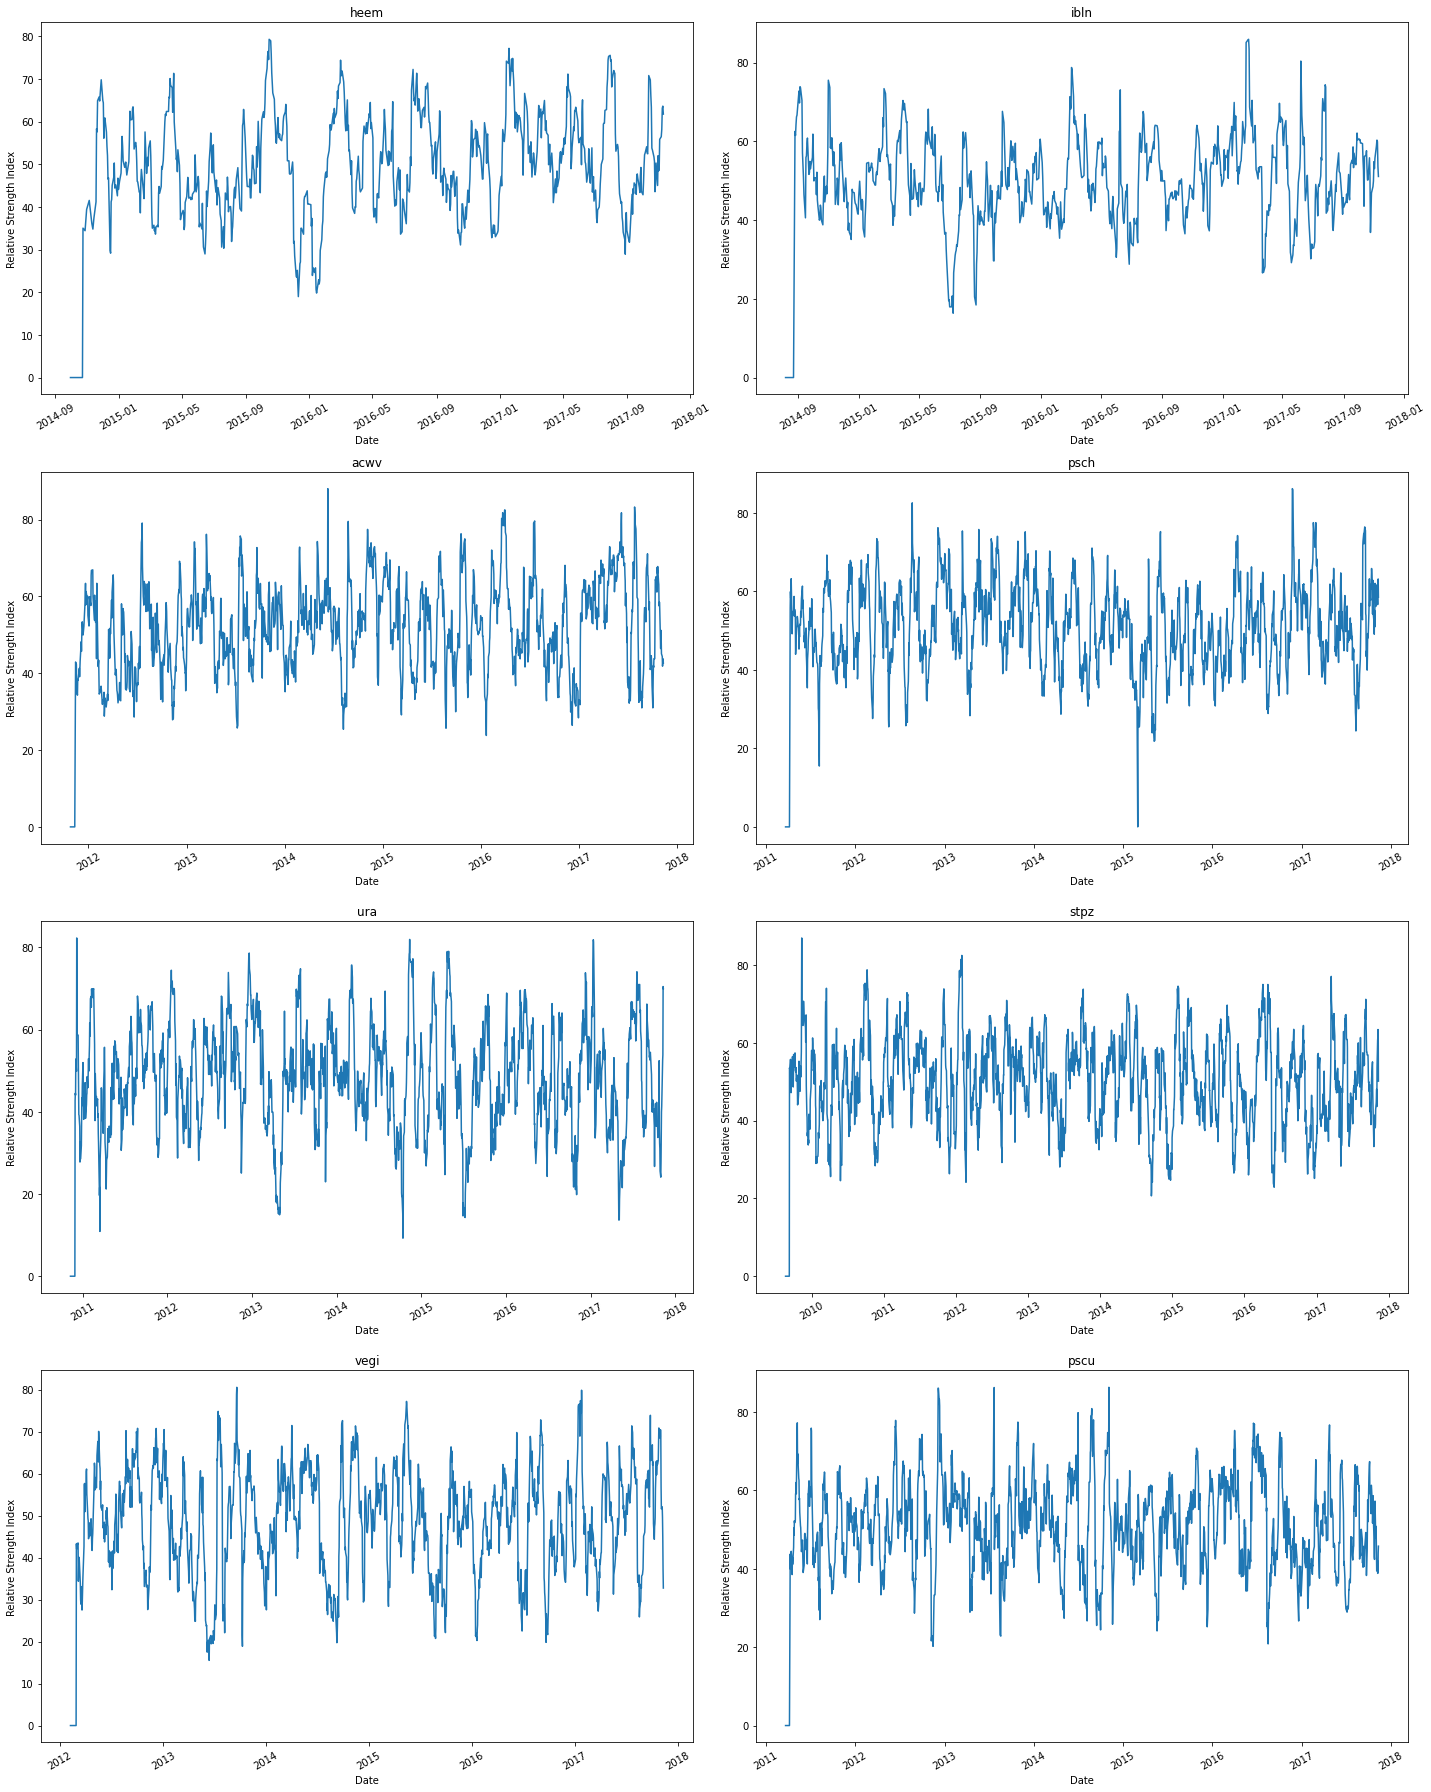

In [ ]:
%matplotlib inline

# RSI Plot

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['RSI_14D'])
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Relative Strength Index")
    plt.xticks(rotation=30)
fig.tight_layout()


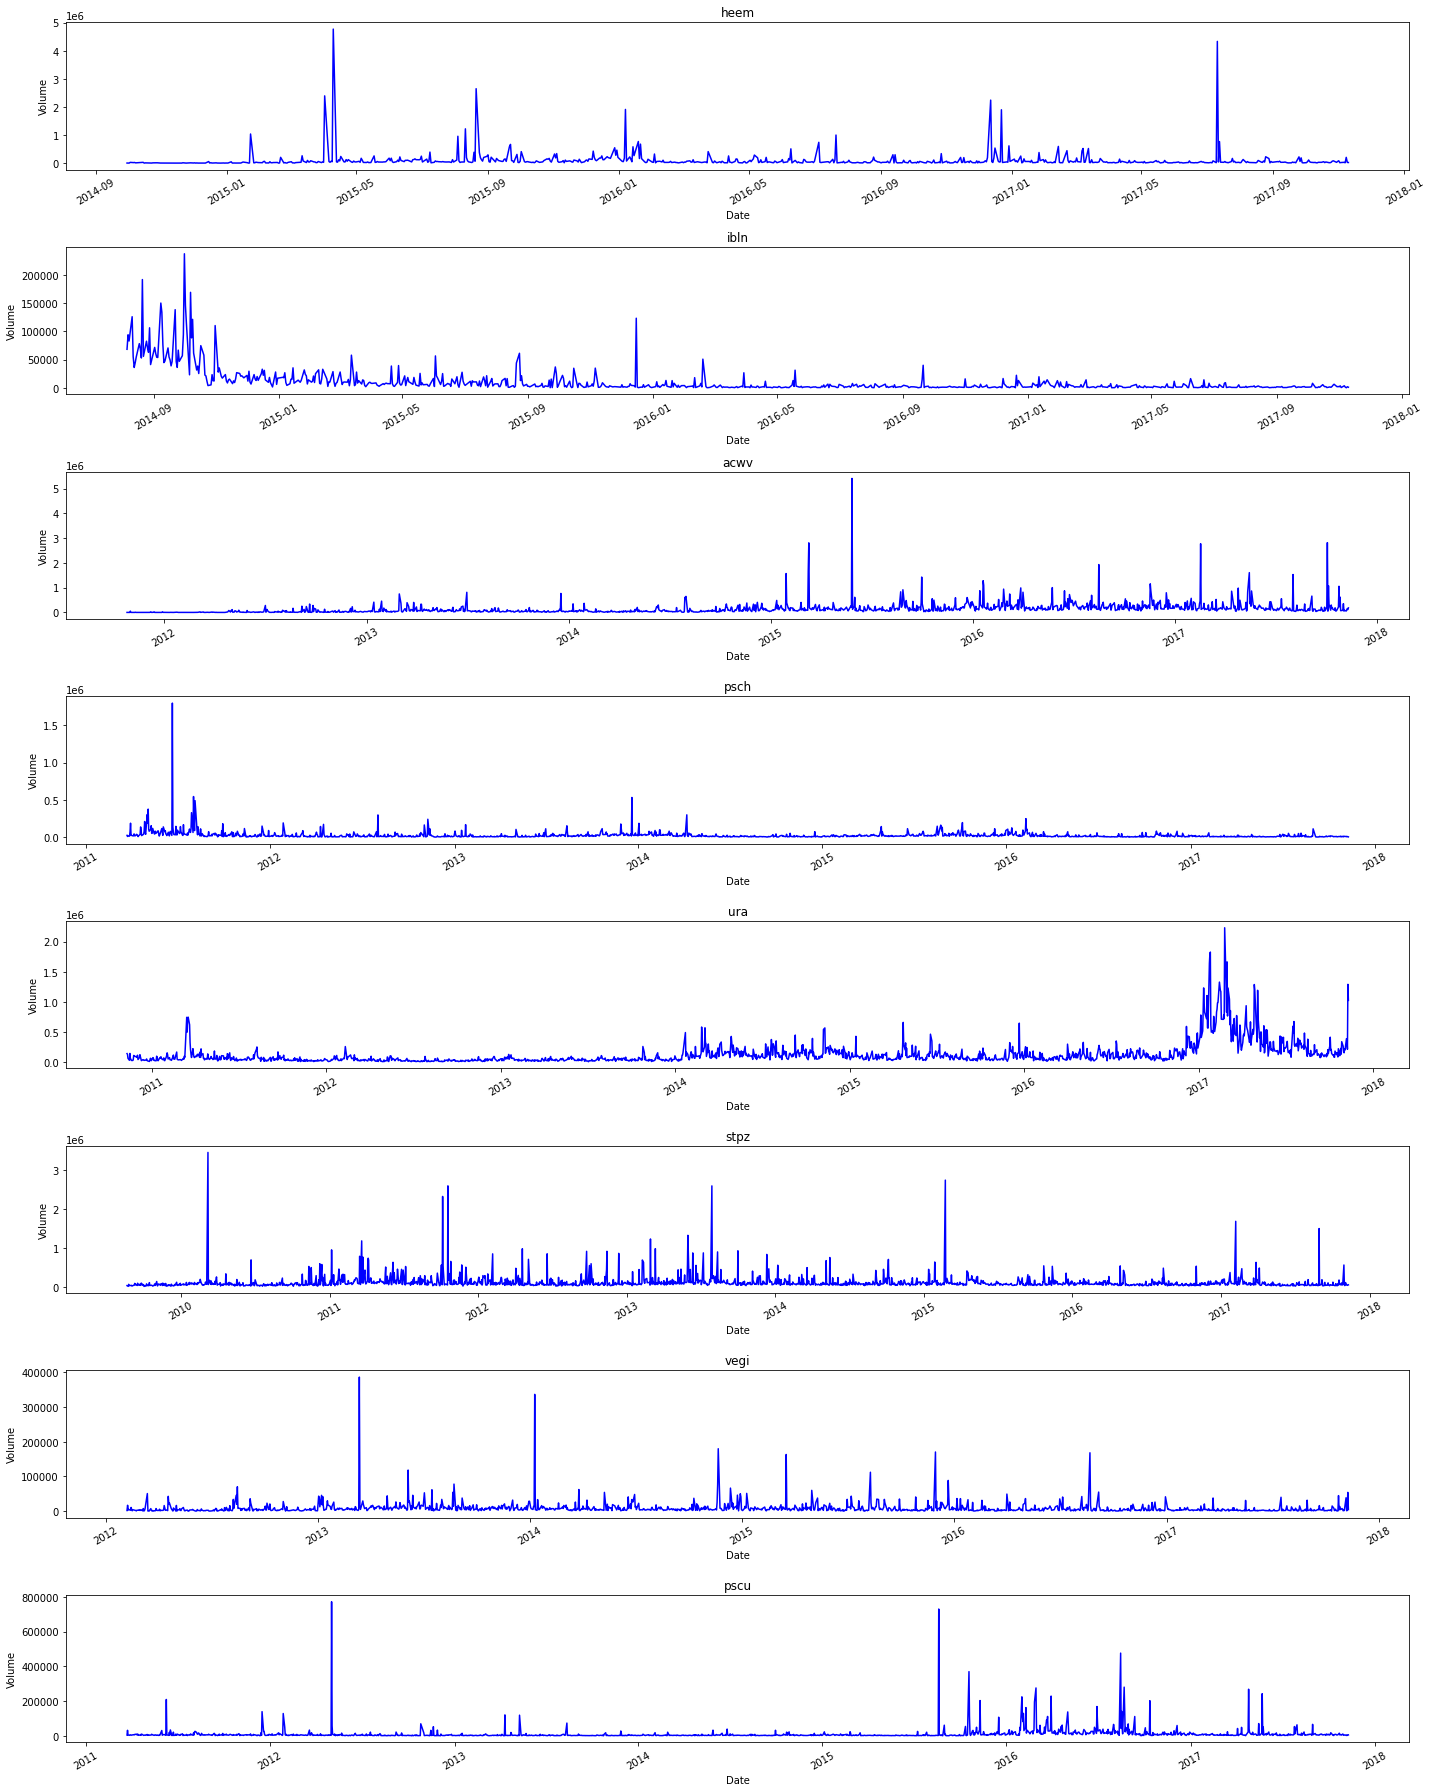

In [ ]:
# Volume Plain plot
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume_plain'], 'b')
    ax.set_title(str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Volume")
    plt.xticks(rotation=30)
fig.tight_layout()

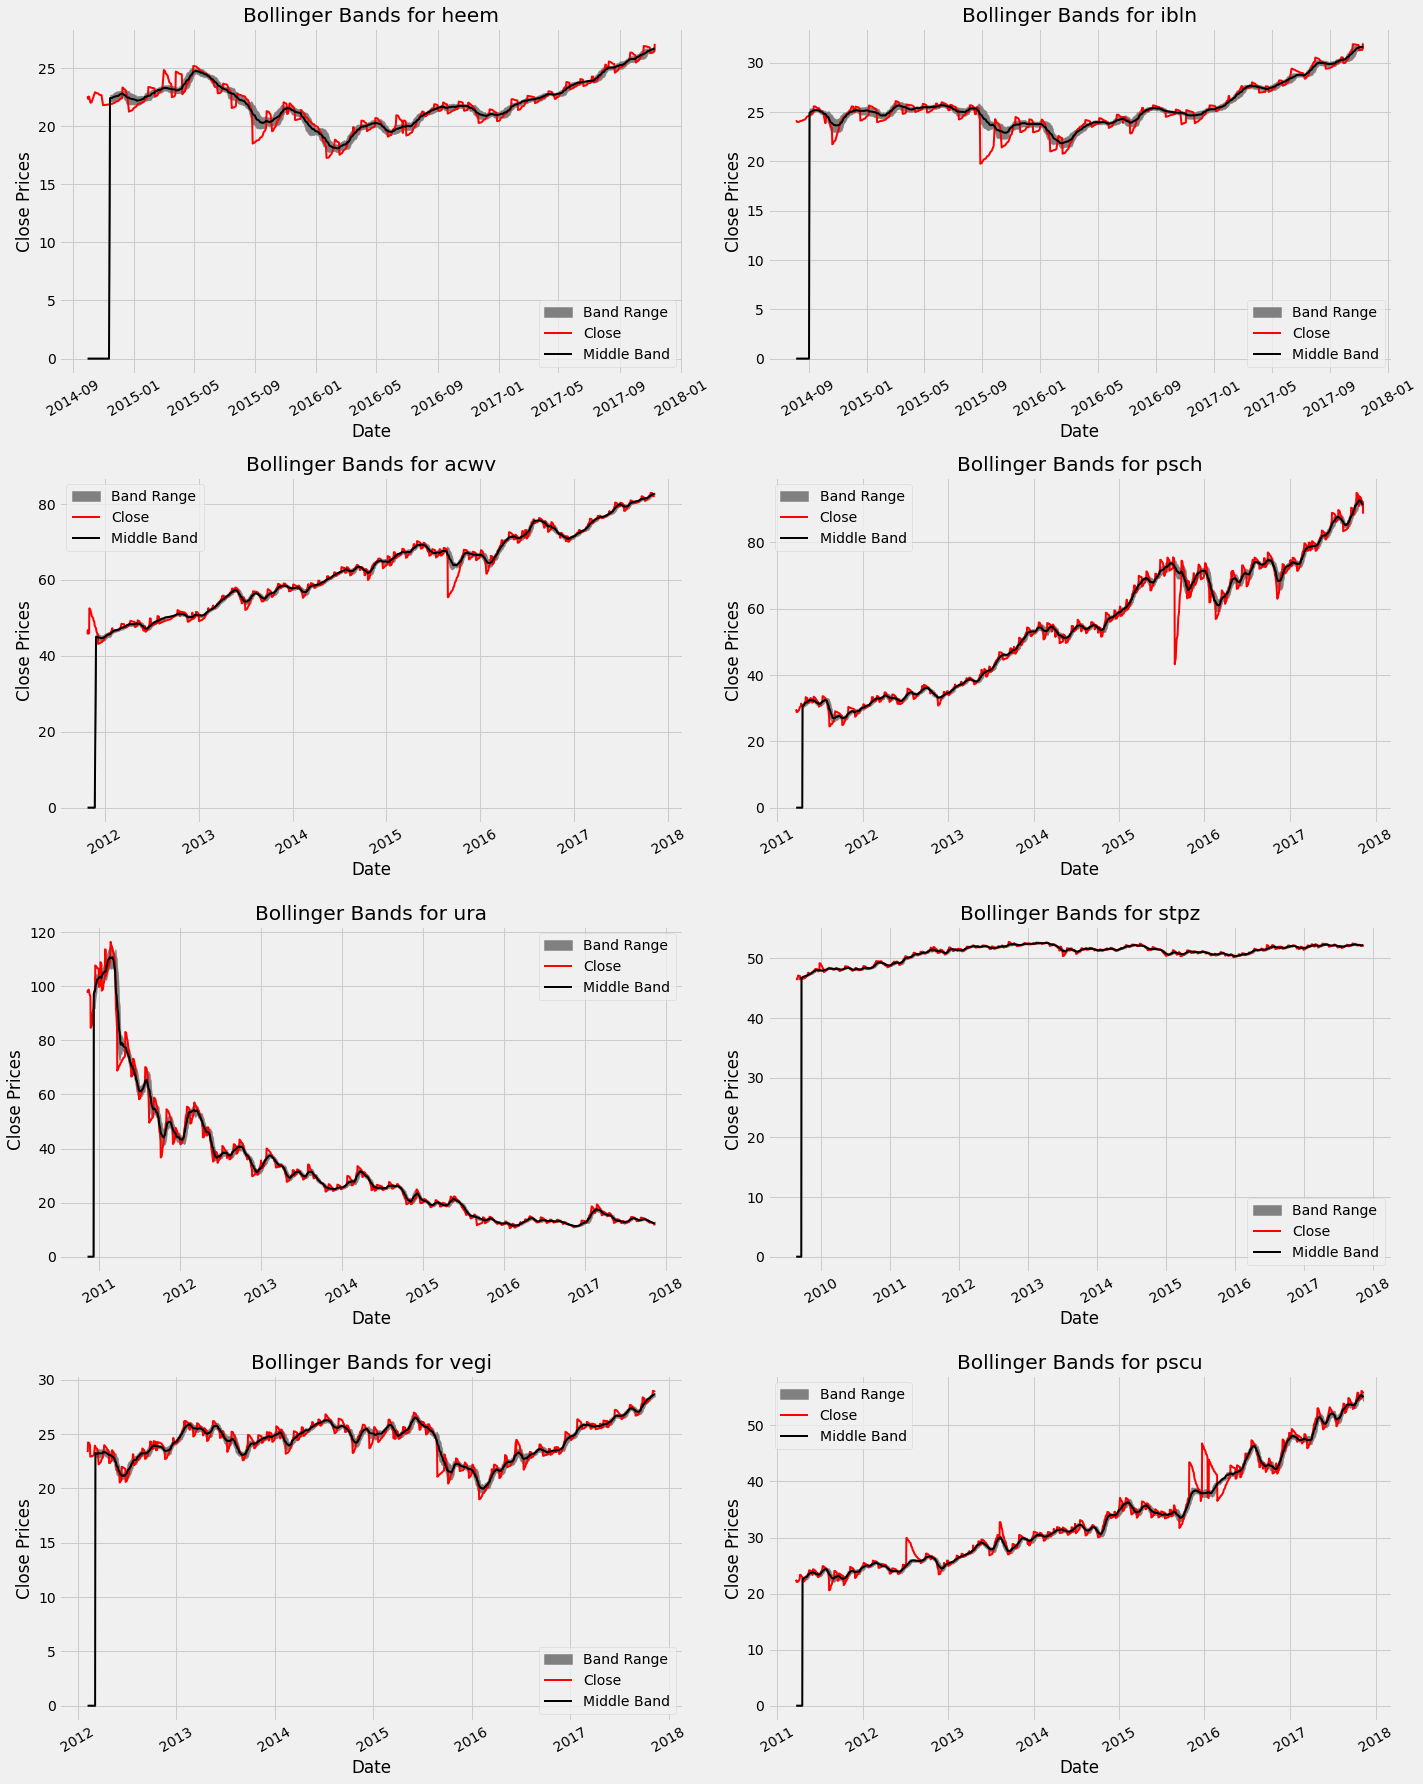

In [ ]:
plt.style.use('fivethirtyeight')

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['BB_Upper_Band'], TechIndicator[i]['BB_Lower_Band'], color='grey', label="Band Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label="Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['BB_Middle_Band'], color='black', lw=2, label="Middle Band")
    ax.set_title("Bollinger Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()
#.dt.to_pydatetime()

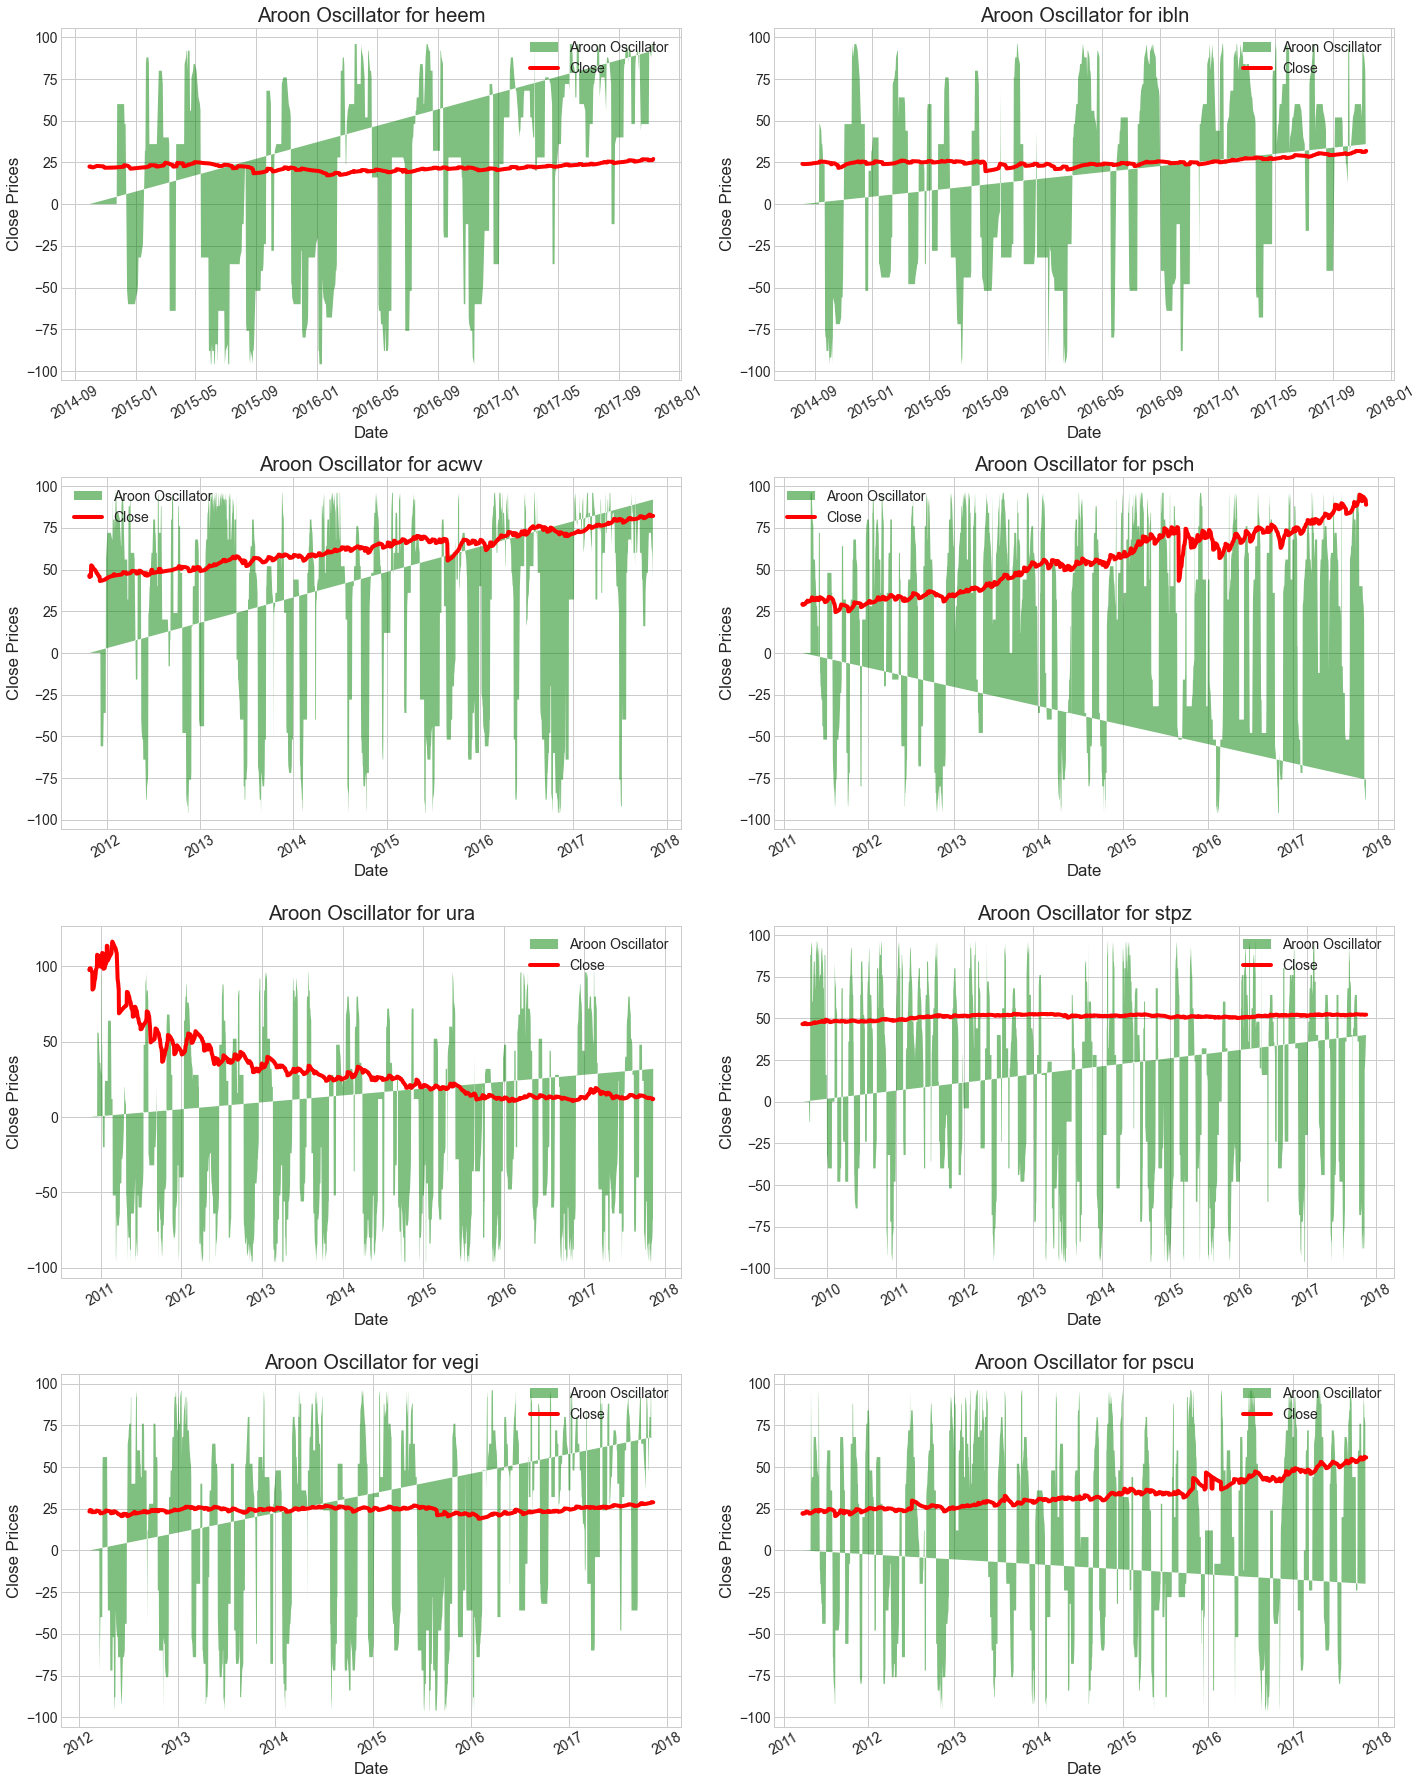

In [ ]:
# Aroon Oscillator Plot
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill(TechIndicator[i].index, TechIndicator[i]['Aroon_Oscillator'],'g', alpha = 0.5, label = "Aroon Oscillator")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
    ax.set_title("Aroon Oscillator for " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

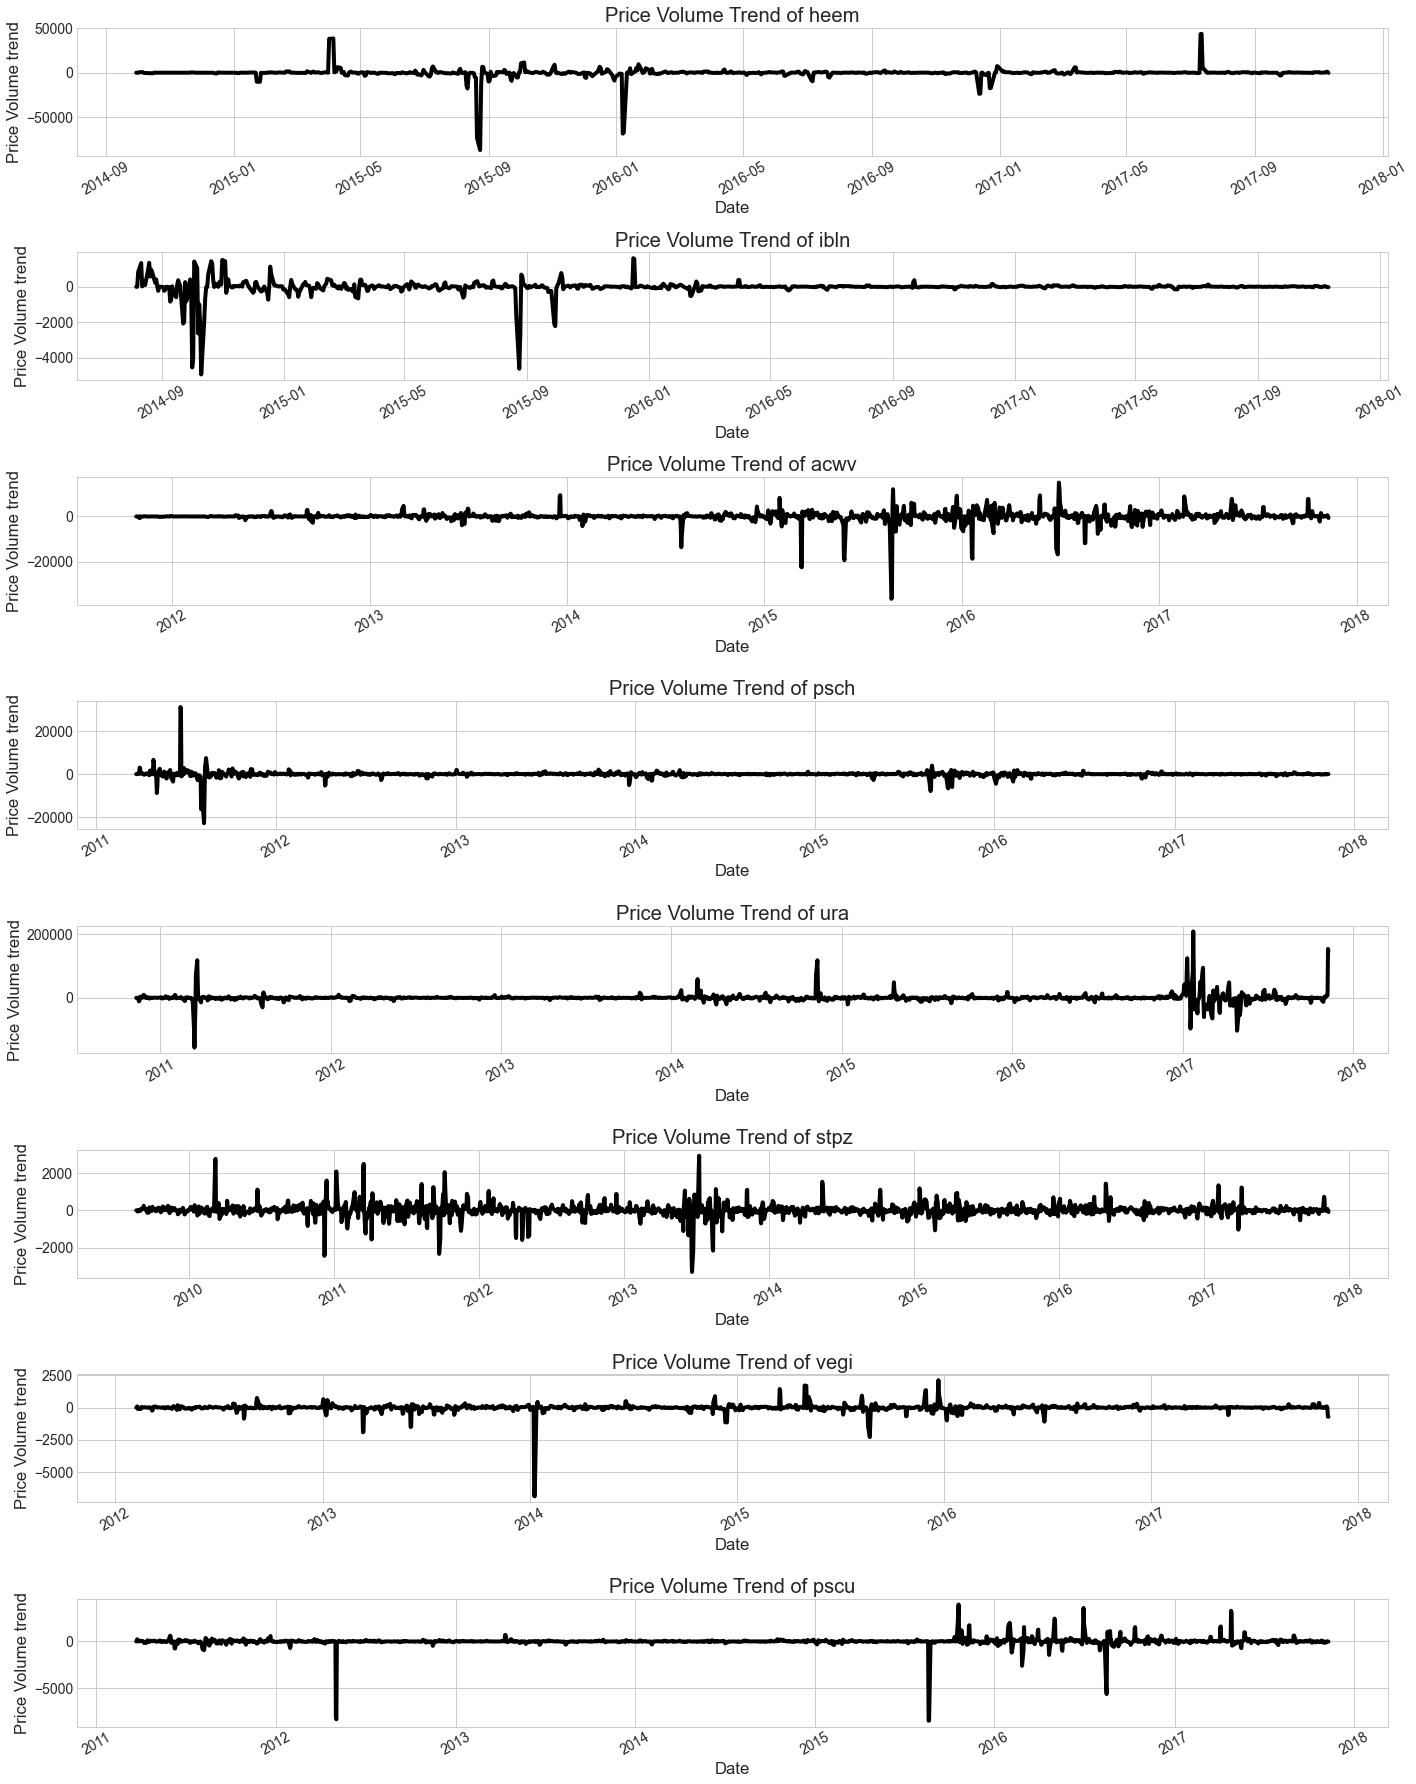

In [ ]:
# PRice Volume Trend Plot
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(8,1,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['PVT'], 'black')
    ax.set_title("Price Volume Trend of " +str(TechIndicator[i]['Label'][0]))
    ax.set_xlabel("Date")
    ax.set_ylabel("Price Volume trend")
    plt.xticks(rotation=30)
fig.tight_layout()

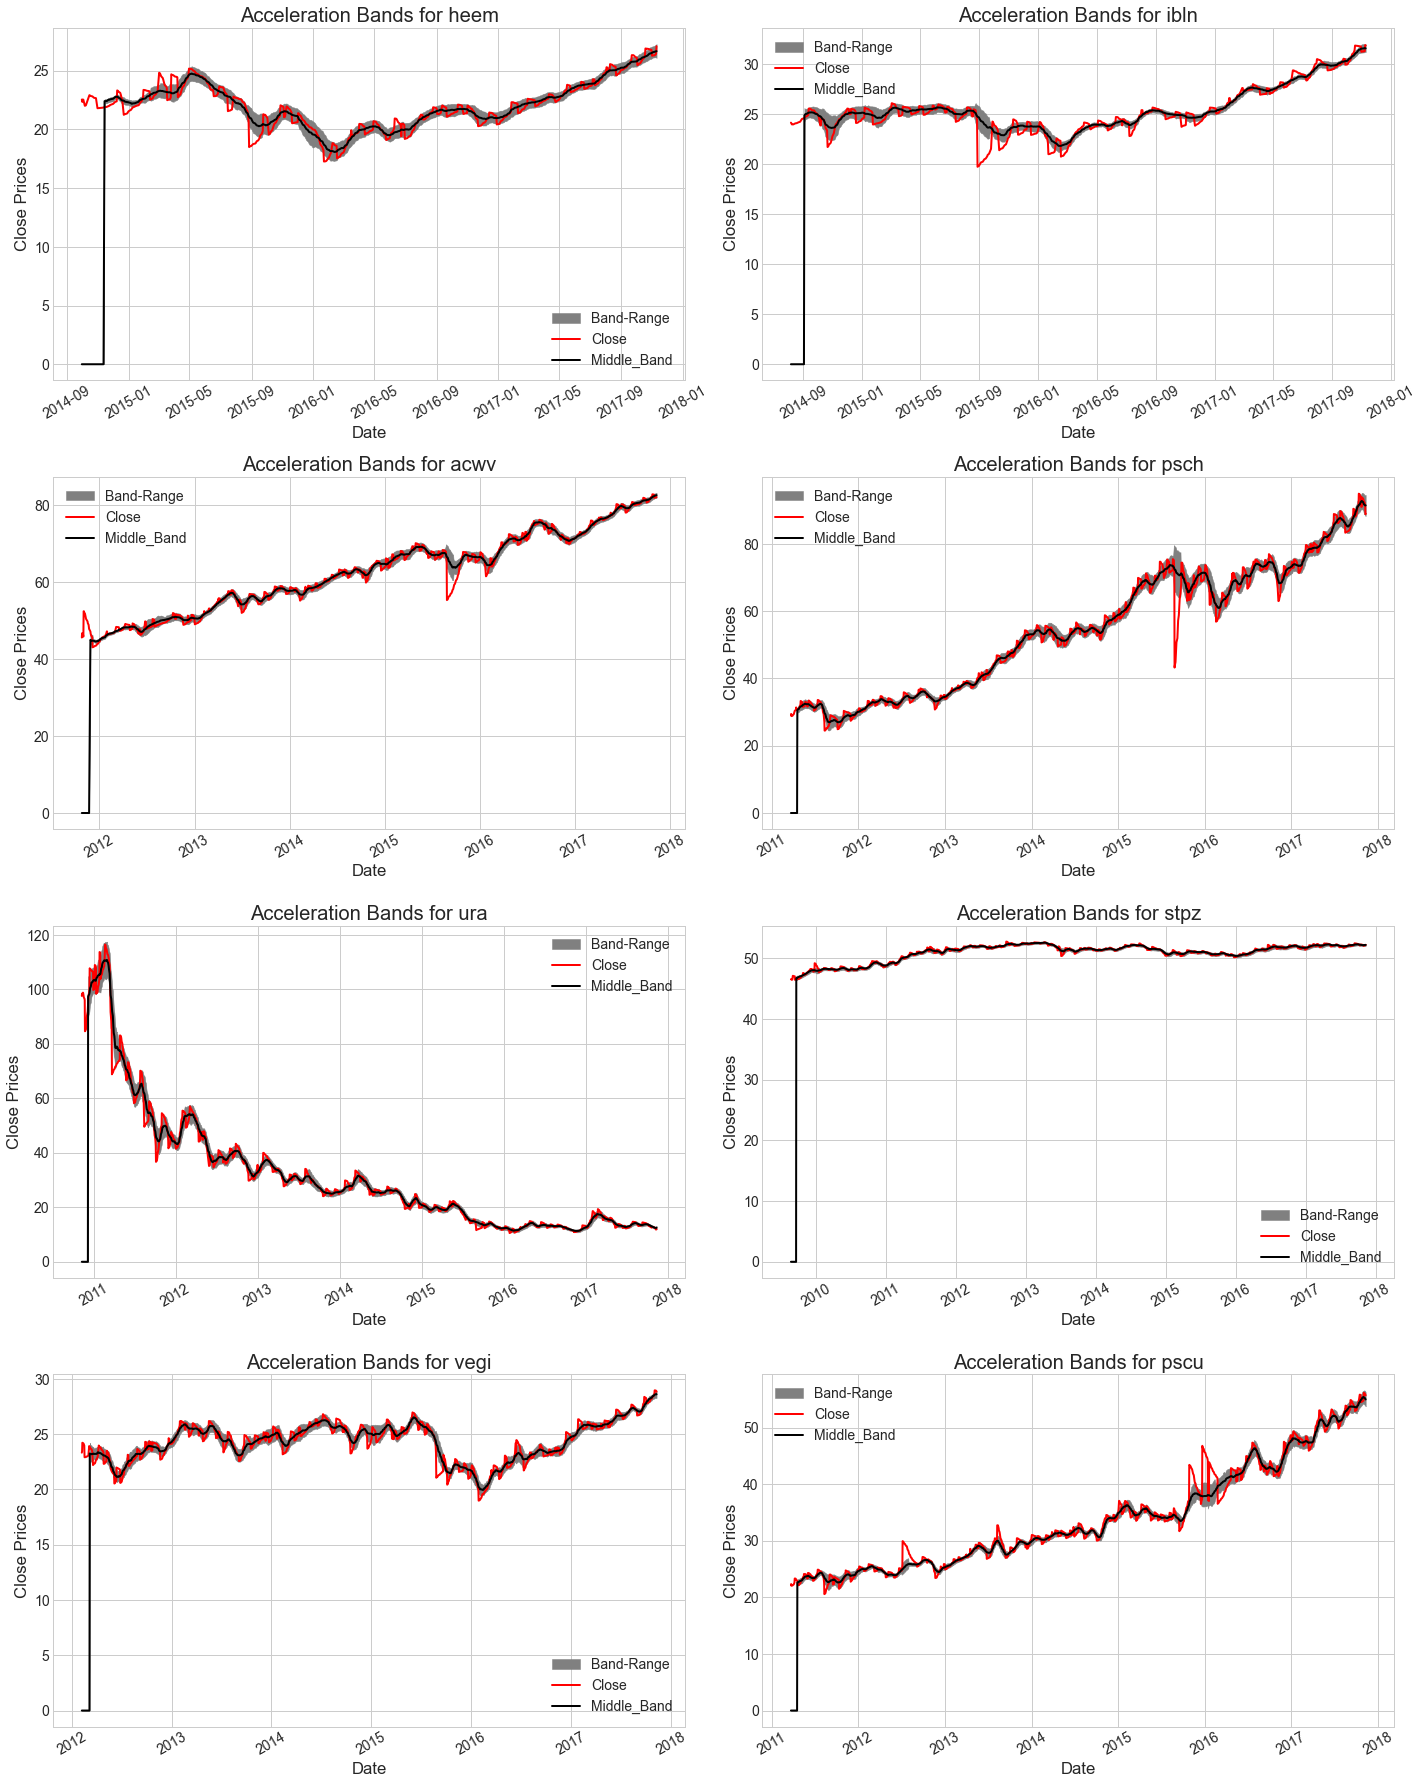

In [ ]:
# Acceleration band Plot

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['AB_Upper_Band'], TechIndicator[i]['AB_Lower_Band'], color='grey', label = "Band-Range")
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', lw=2, label = "Close")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['AB_Middle_Band'], color='black', lw=2, label="Middle_Band")
    ax.set_title("Acceleration Bands for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

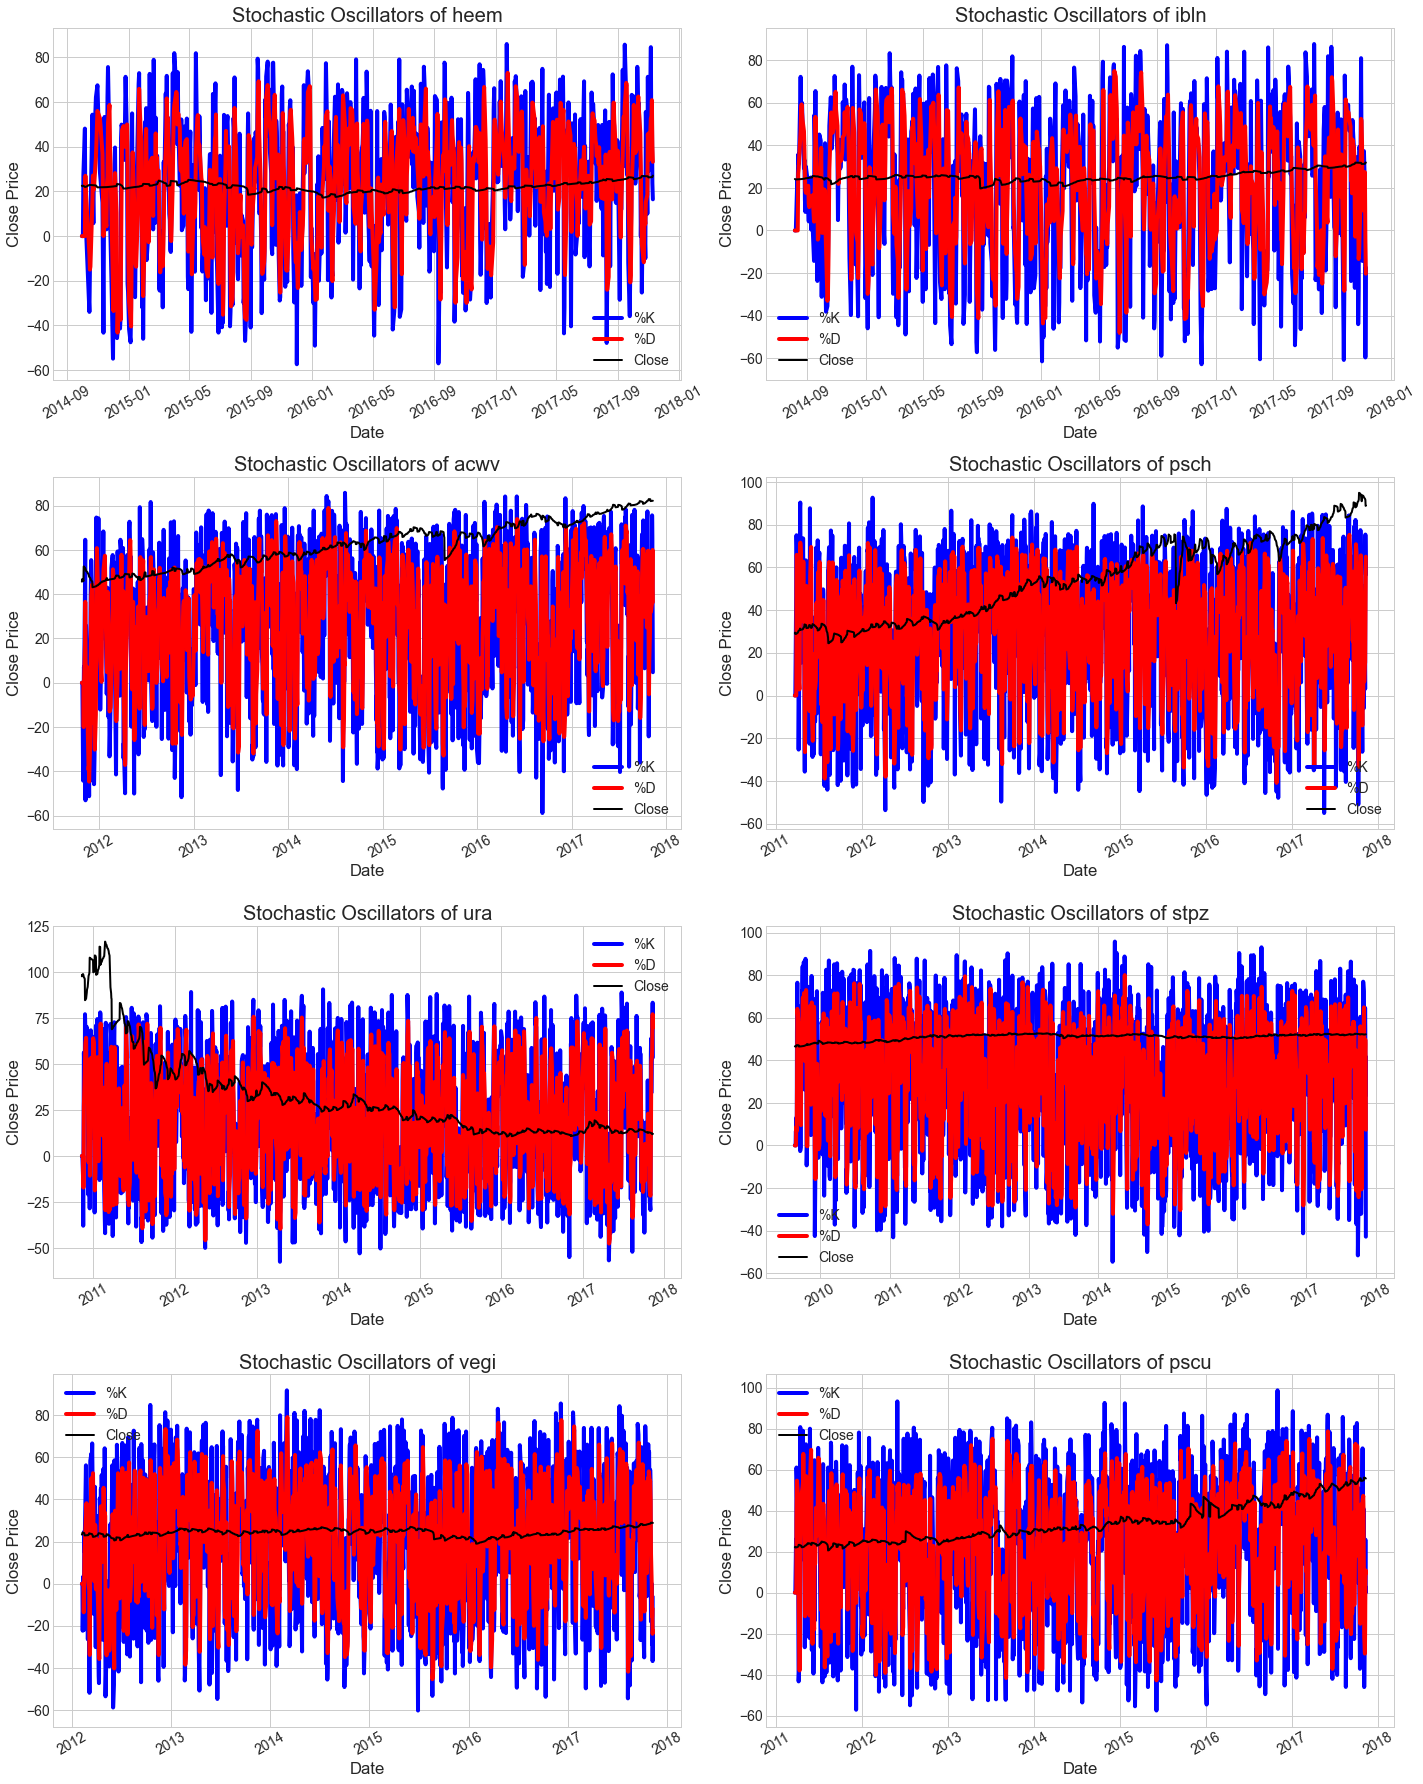

In [ ]:
# Stochastic Oscillator plots
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['STOK'], 'blue', label="%K")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['STOD'], 'red', label="%D")
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='black', lw=2, label = "Close")
    ax.set_title("Stochastic Oscillators of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.xticks(rotation=30)
fig.tight_layout()

In [ ]:
# Chaikin Money Flow Plots
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(25,40))
outer = gridspec.GridSpec(4, 2, wspace=0.2, hspace=0.2)

for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,
                    subplot_spec=outer[i], wspace=0.1, hspace=0.1)

    for j in range(2):
        ax = plt.Subplot(fig, inner[j])
        if j==0:
            t = ax.fill(TechIndicator[i].index, TechIndicator[i]['Chaikin_MF'],'b', alpha = 0.5, label = "Chaikin MF")
            ax.set_title("Chaikin Money Flow for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("Money Flow")
        else:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'r', label="Close")
            t = ax.set_ylabel("Close")
        ax.legend()
        ax.set_xlabel("Date")
        
        fig.add_subplot(ax)
fig.tight_layout()

KeyError: 'Chaikin_MF'

<Figure size 1800x2880 with 0 Axes>

In [ ]:
# Parabolic SAR, Rate of Change, Momentum and VWAP Plots
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['psar'], 'blue', label="PSAR", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['ROC'], 'red', label="ROC", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Momentum'], 'green', label="Momentum", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['VWAP'], 'cyan', label="VWAP", alpha = 0.5)
    ax.set_title("PSAR, ROC, Momentum and VWAP of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.xticks(rotation=30)
fig.tight_layout()

In [ ]:
# Commodity Channel Index, Triple Exponential Moving Average On Banalance Volume Plots

fig = plt.figure(figsize=(25,80))
outer = gridspec.GridSpec(4, 2, wspace=0.2, hspace=0.2)

for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.3, hspace=0.3)

    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        if j==0:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['CCI'], 'green', label="CCI")
            t = ax.set_title("CCI for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("Commodity Channel Index")
        elif j == 1:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['TEMA'], 'blue', label="TEMA")
            t = ax.set_title("TEMA for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("TripleExponentiaL MA")
        else:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['OBV'], 'red', label="OBV")
            t = ax.set_title("OBV for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("On Balance Volume")
        ax.legend()
        #ax.set_title("CCI, TEMA, OBV for " +str(techindi2[i]['Label'][0]))
        ax.set_xlabel("Date")
        
        fig.add_subplot(ax)
fig.tight_layout()

In [ ]:
# Normalized Average True range Plots
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['NATR'], 'red', label="NATR", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'cyan', label="Close", alpha = 0.5)
    ax.set_title("NATR of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Price")
    plt.xticks(rotation=30)
fig.tight_layout()

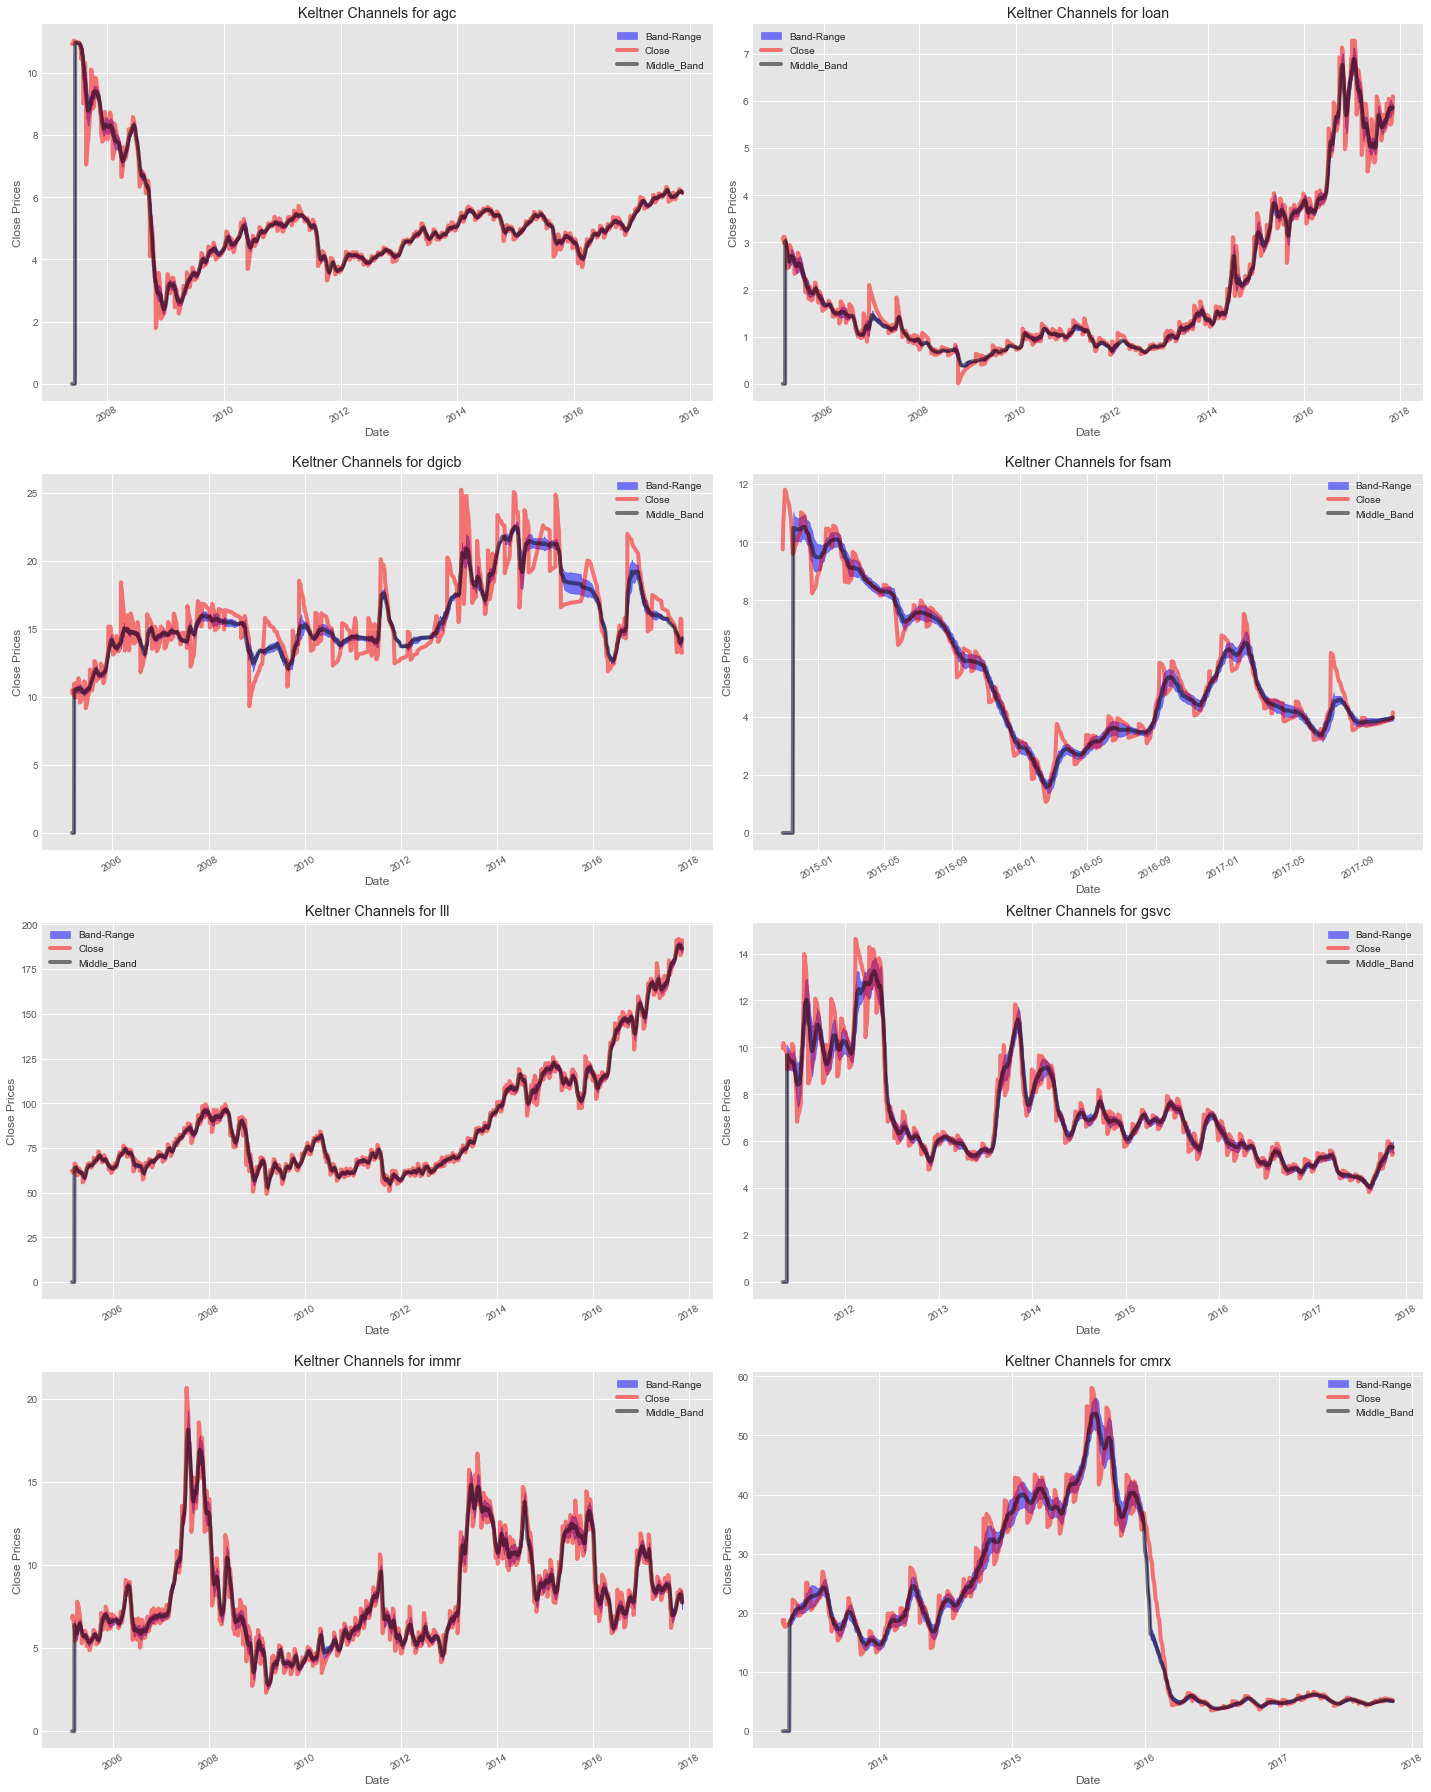

In [ ]:
# Keltner Channels Plots

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['Kelch_Upper'], TechIndicator[i]['Kelch_Down'], 
                    color='blue', label = "Band-Range", alpha = 0.5)
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], color='red', label = "Close", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Kelch_Middle'], color='black', label="Middle_Band", alpha = 0.5)
    ax.set_title("Keltner Channels for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Close Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

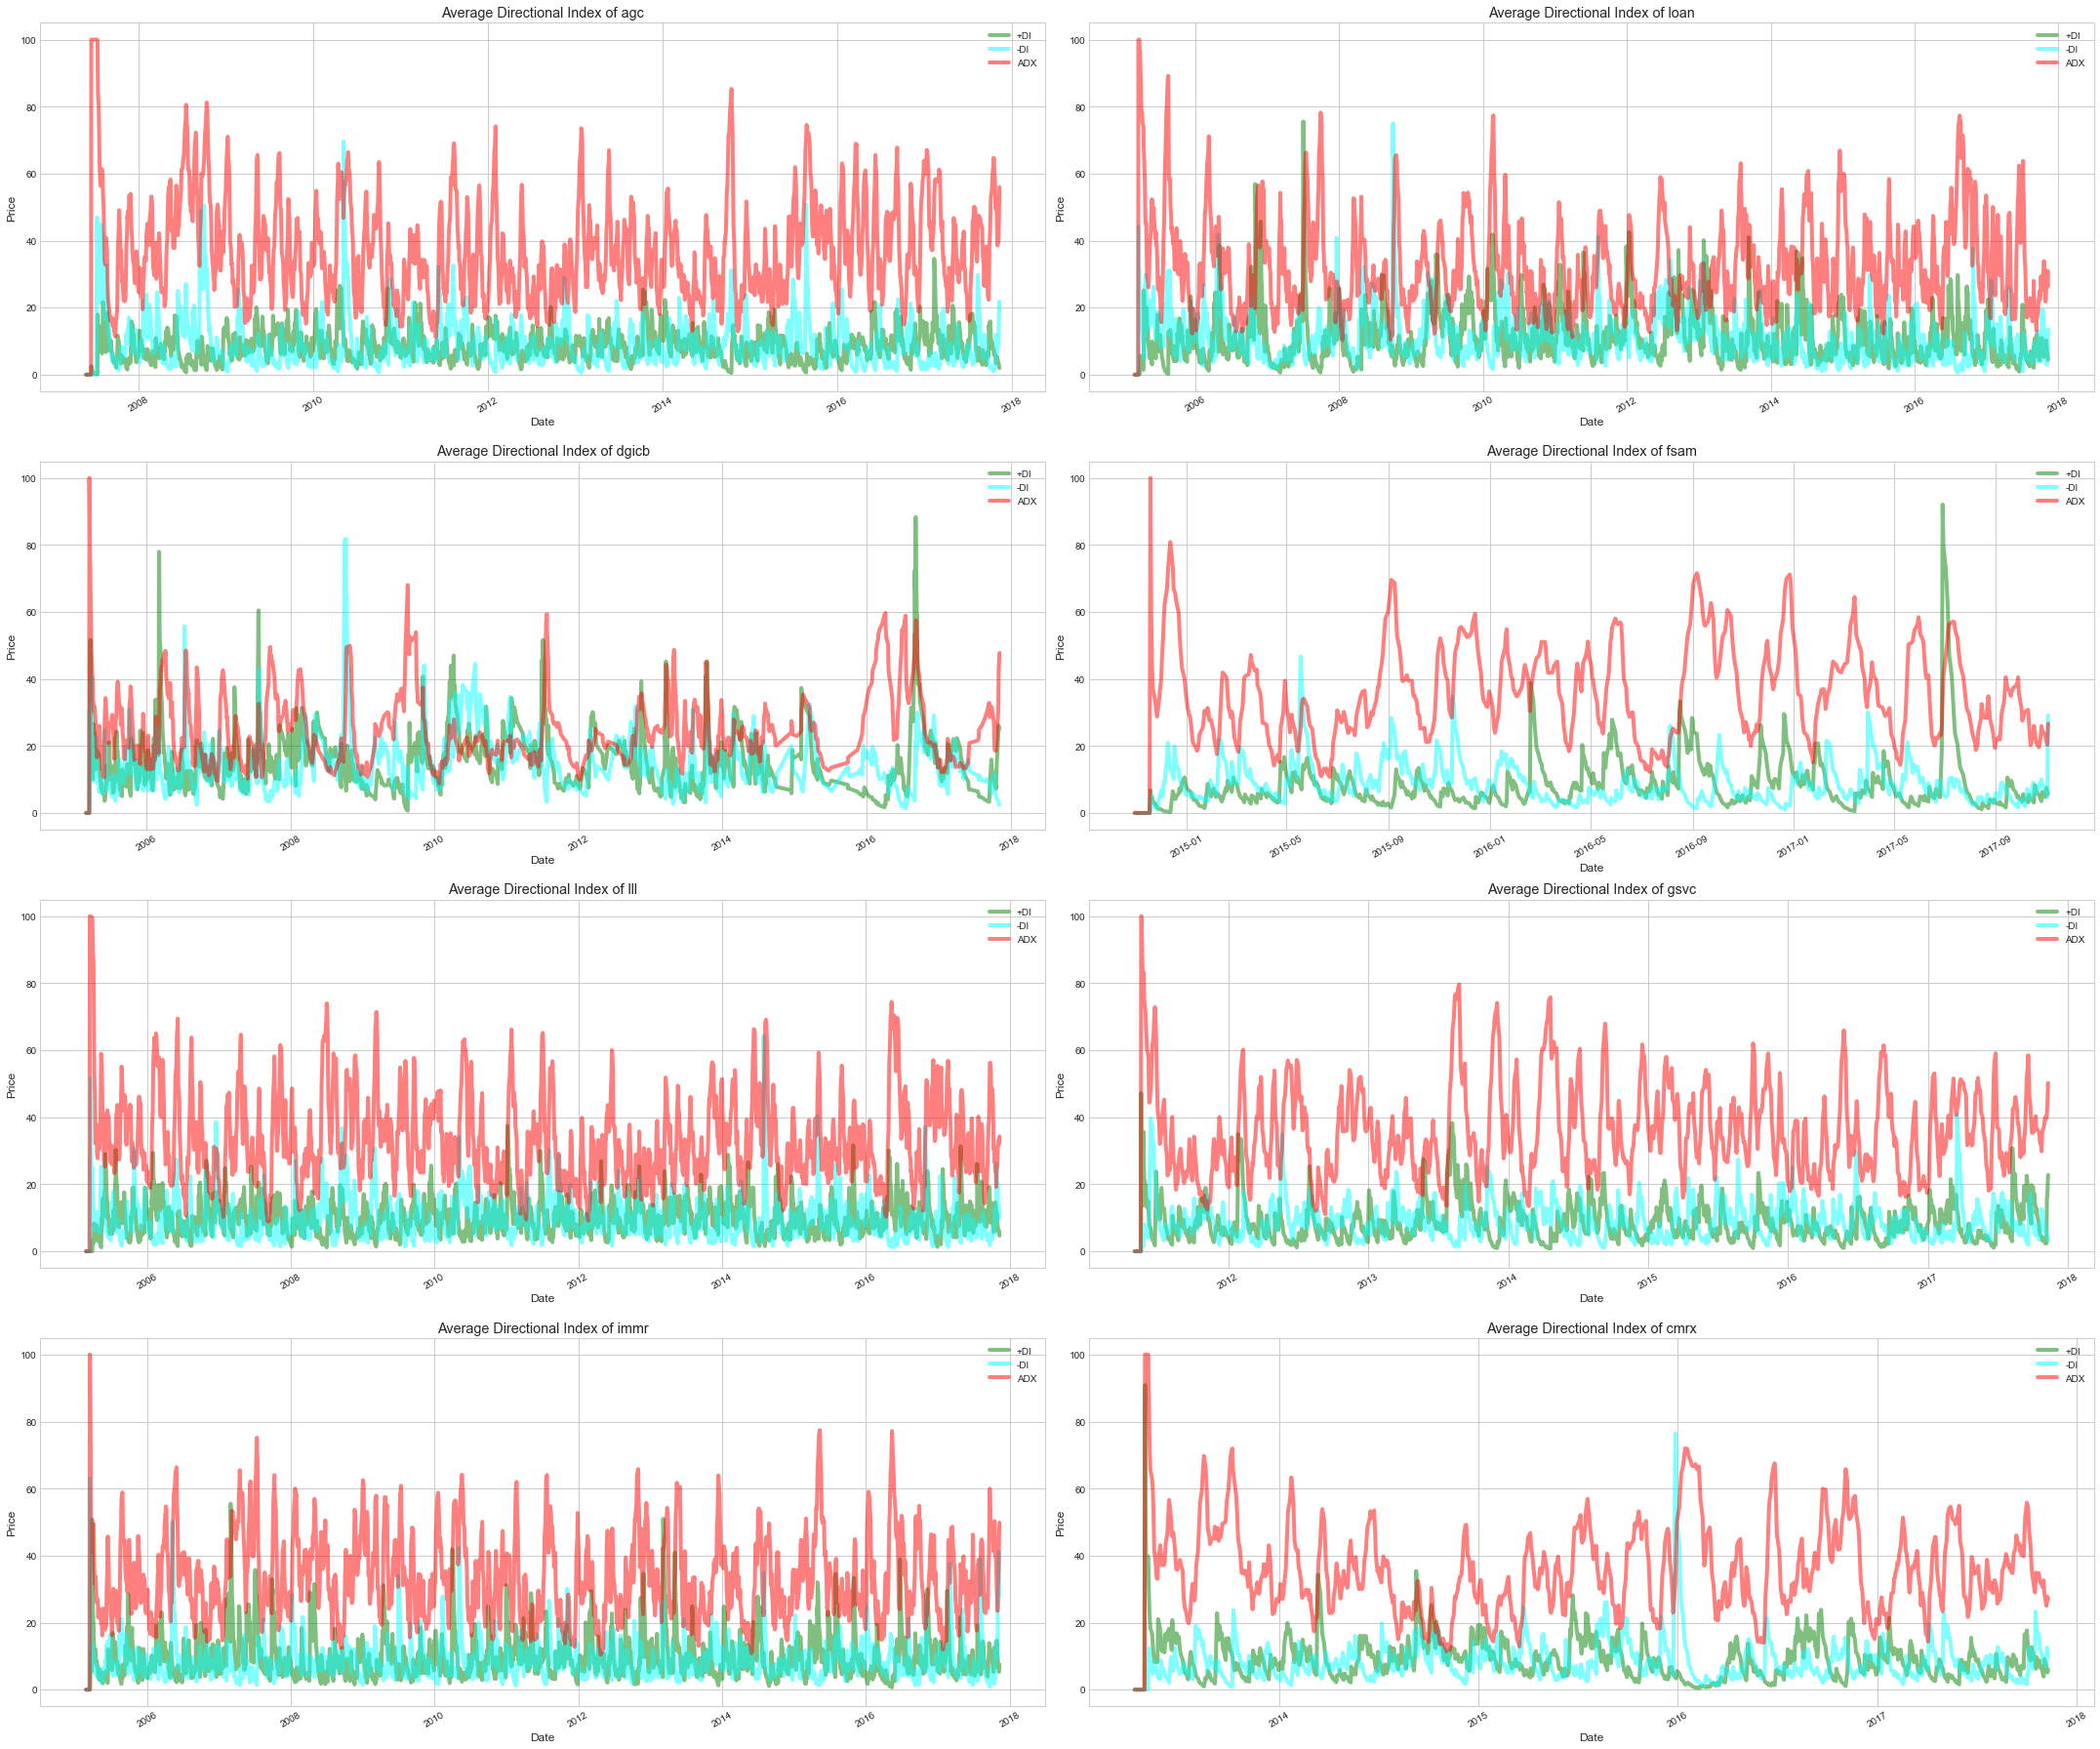

In [ ]:
# Average Directional Index

plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(30,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['plusDI'], 'green', label="+DI", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['minusDI'], 'cyan', label="-DI", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['ADX'], 'red', label="ADX", alpha = 0.5)
    ax.set_title("Average Directional Index of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.xticks(rotation=30)
fig.tight_layout()

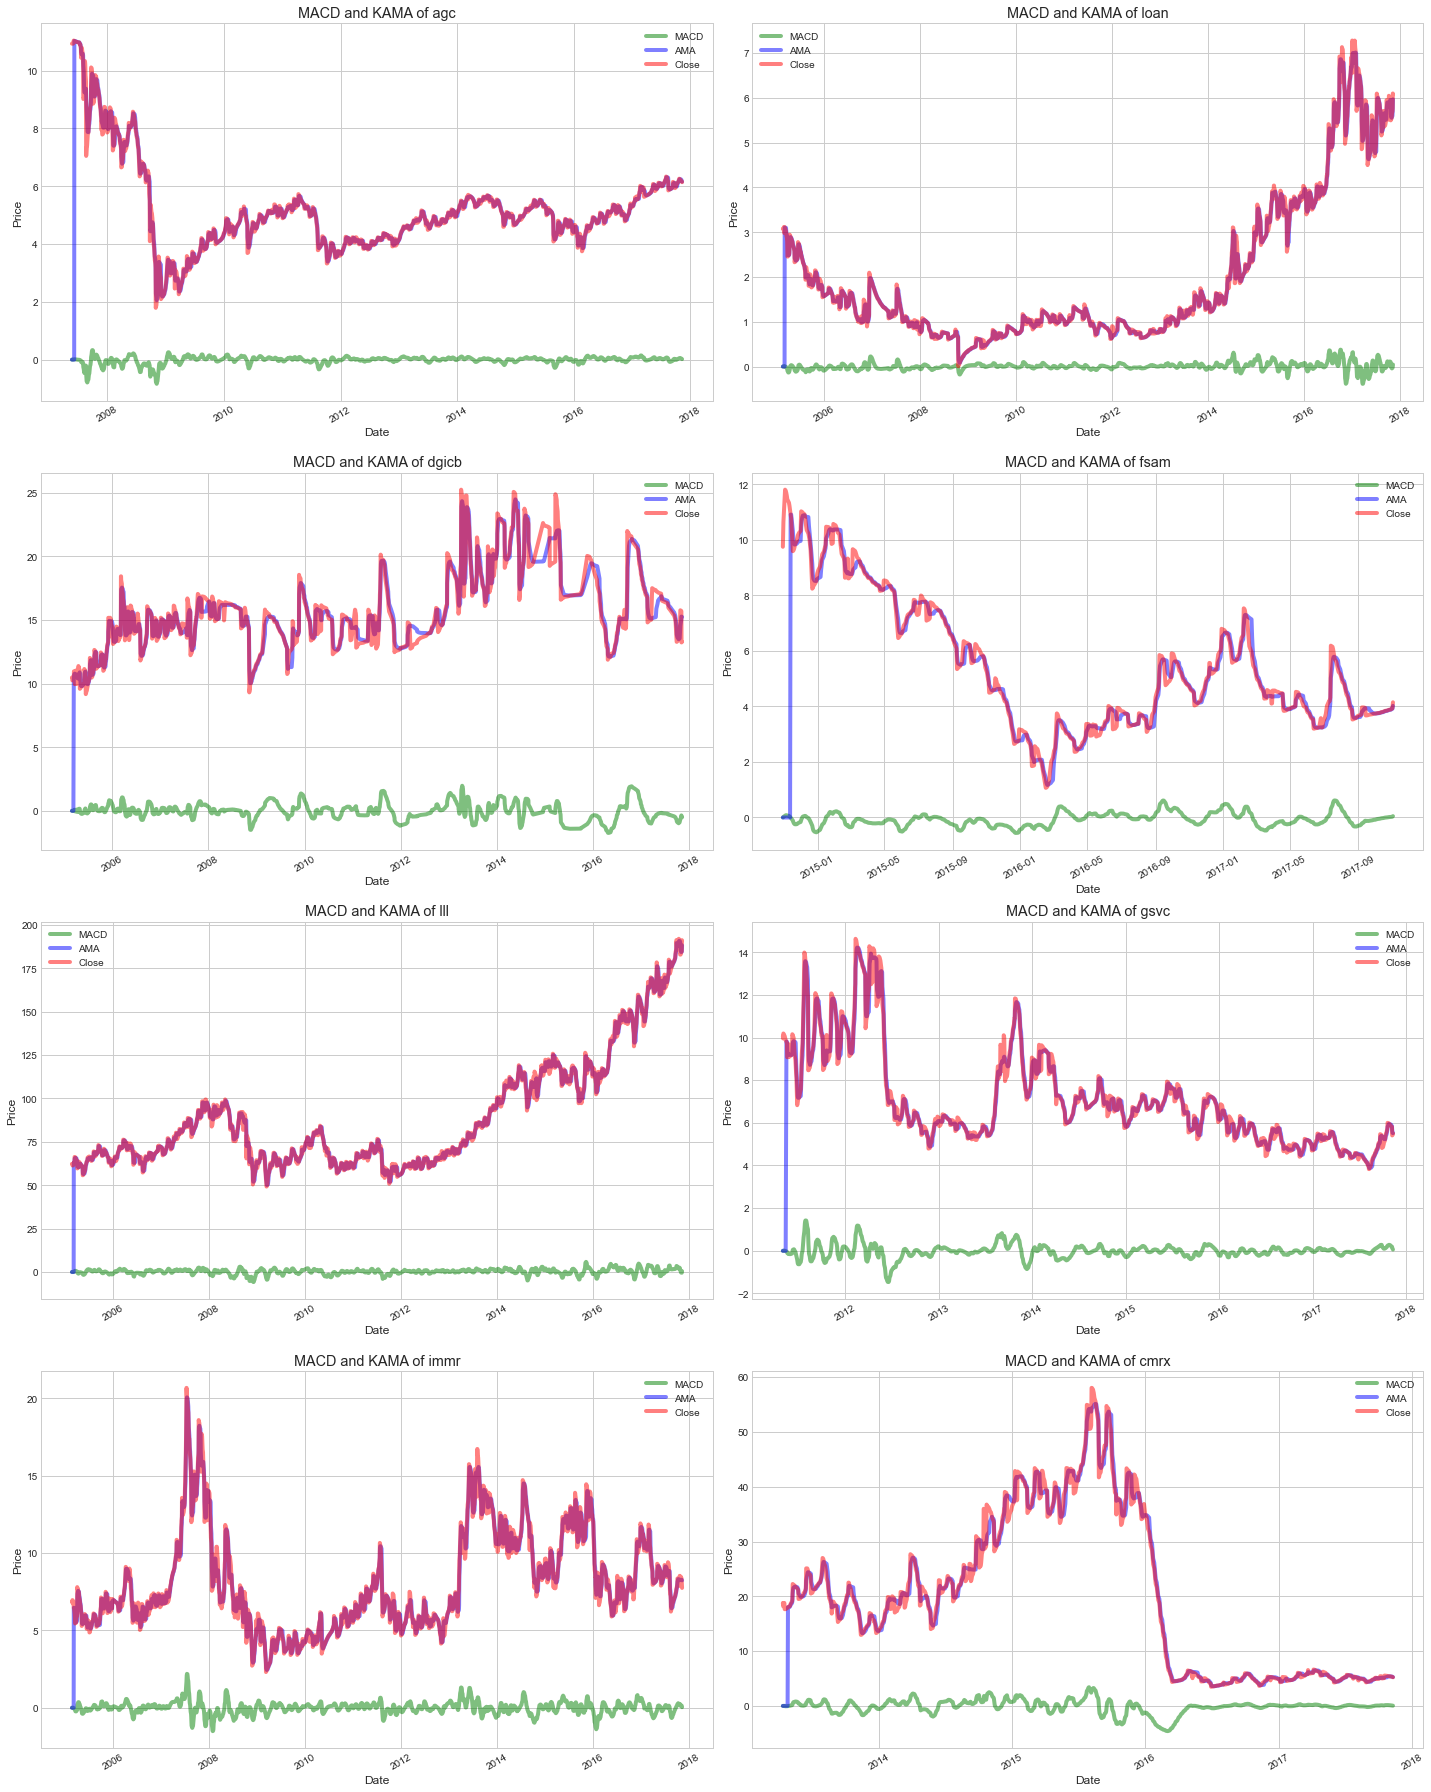

In [ ]:
# Moving Average Convergence Divergence, Adaptive Moving Avergae Plots
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['MACD'], 'green', label="MACD", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['KAMA'], 'blue', label="AMA", alpha = 0.5)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['Close'], 'red', label="Close", alpha = 0.5)
    ax.set_title("MACD and KAMA of " +str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Price")
    plt.xticks(rotation=30)
fig.tight_layout()

C:\Users\safar\AppData\Local\Temp\ipykernel_168176\1192702742.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


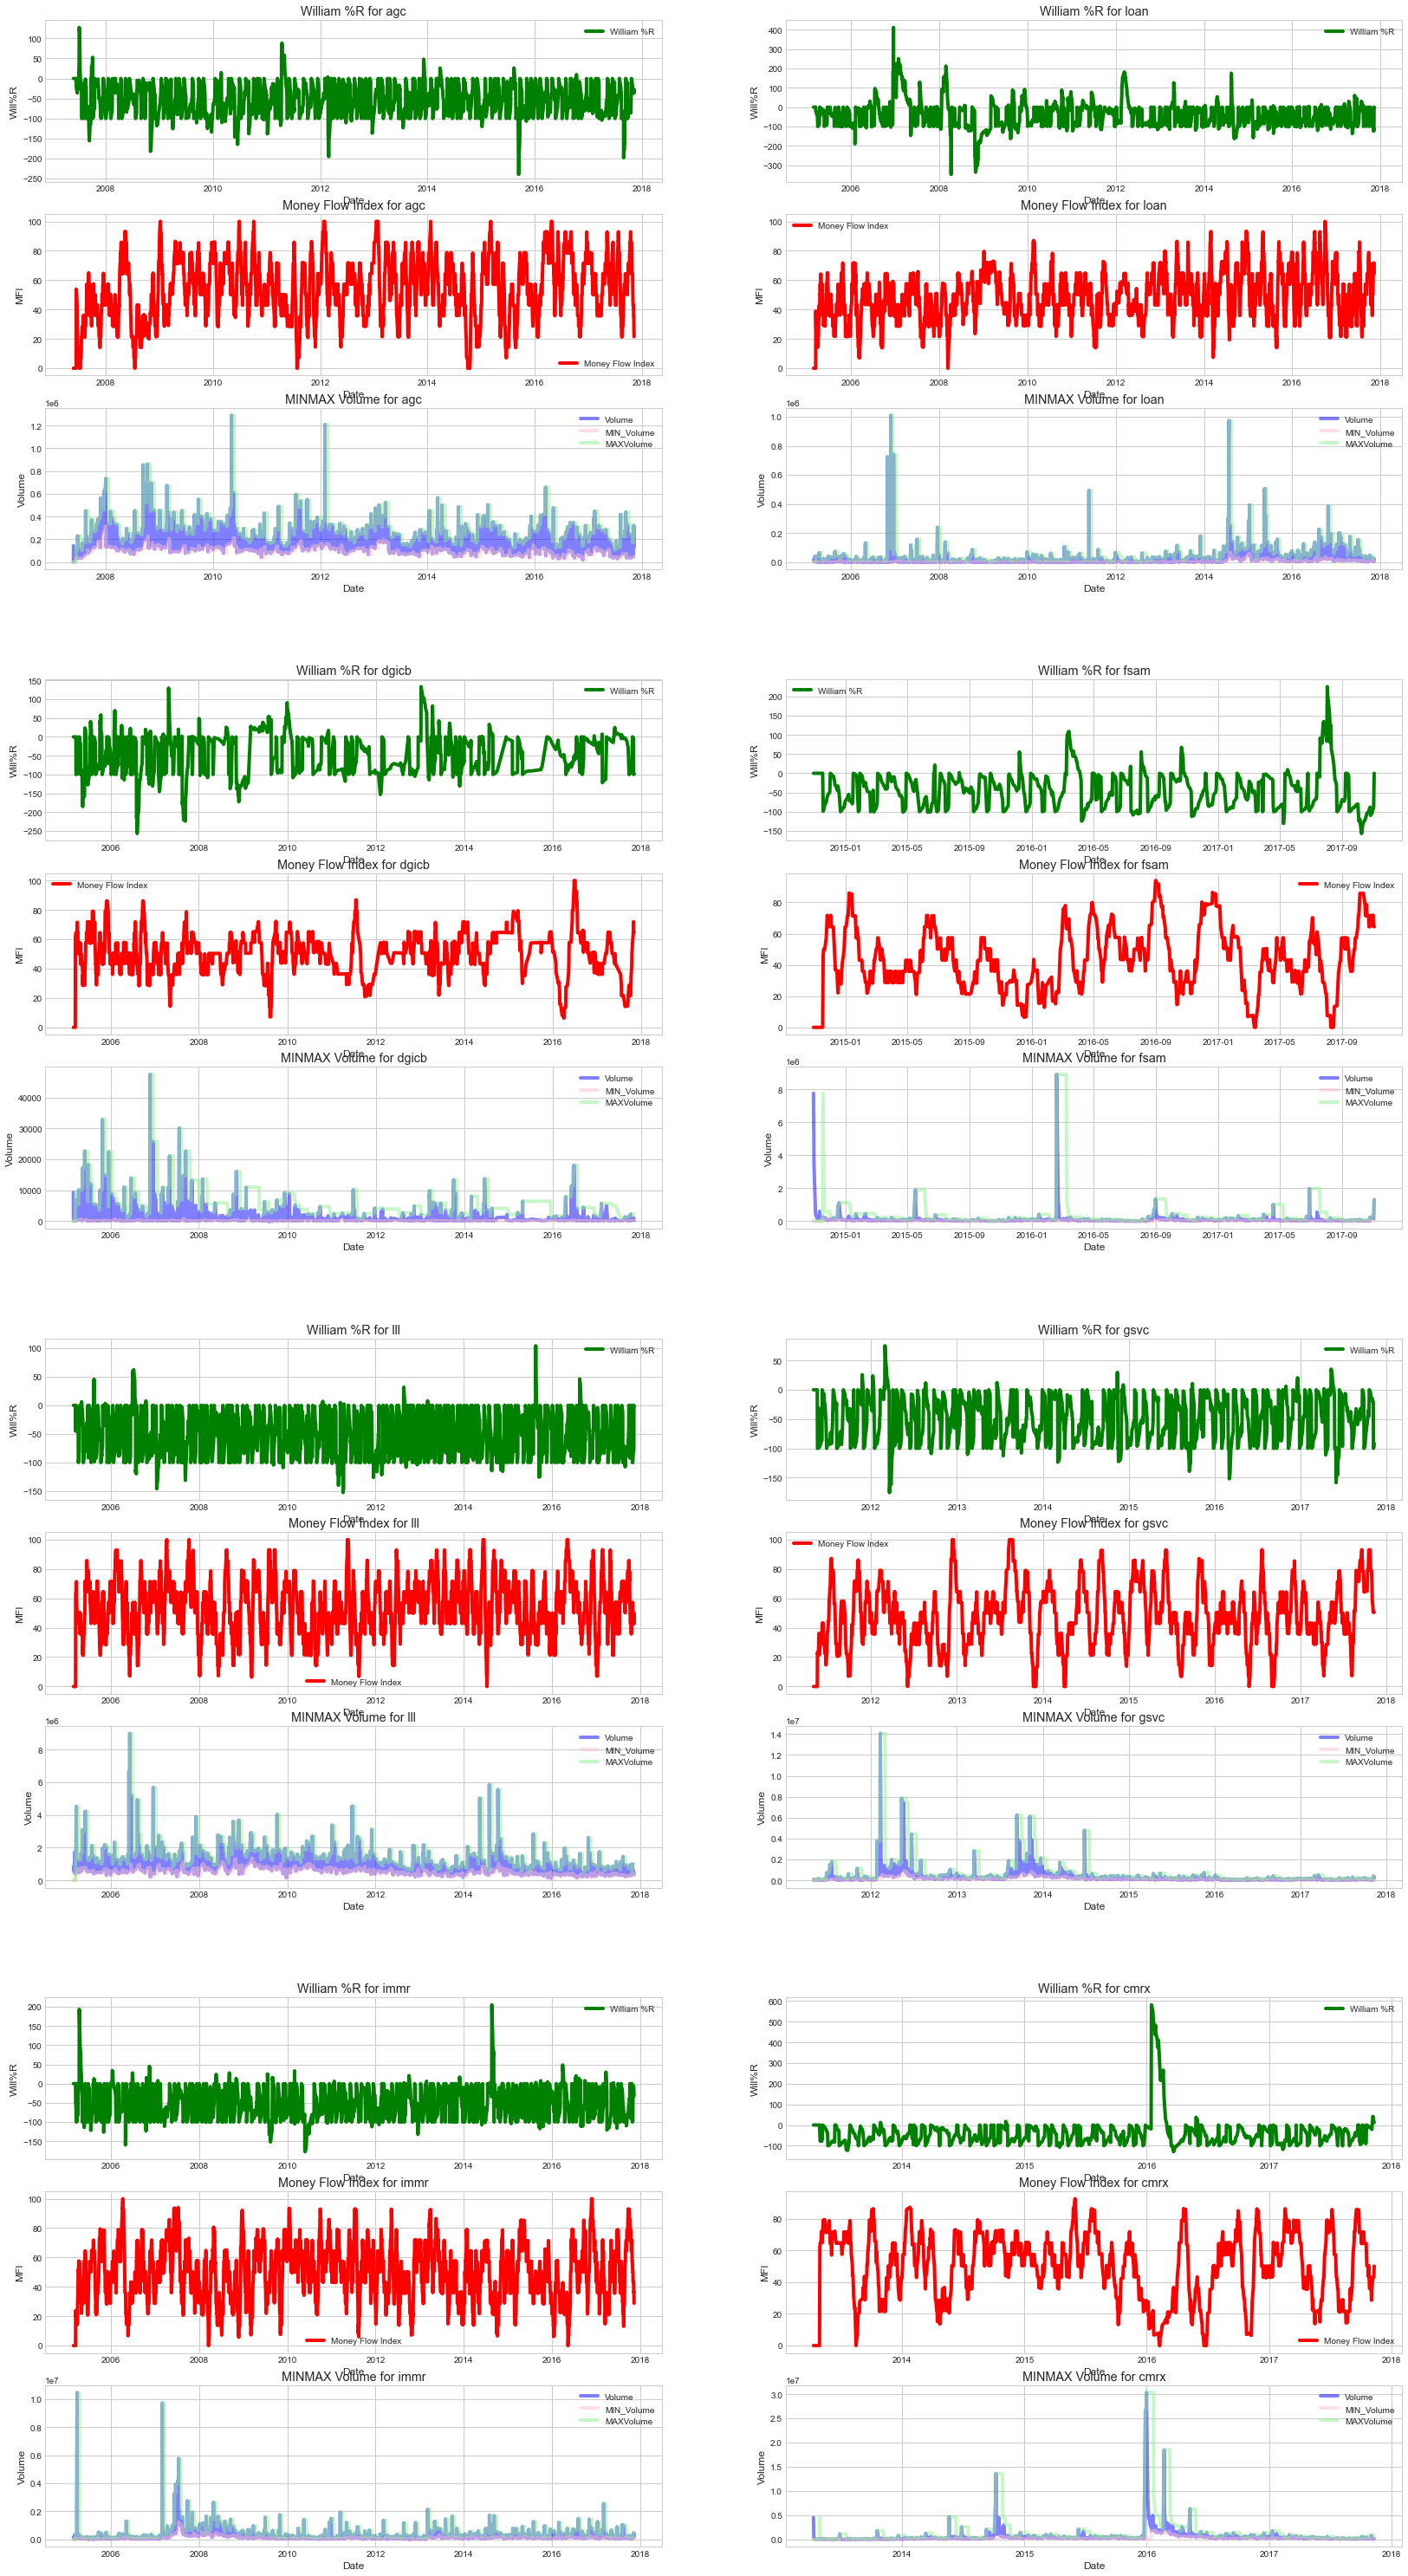

In [ ]:
# William %R, Money Flow
fig = plt.figure(figsize=(25,50))
outer = gridspec.GridSpec(4, 2, wspace=0.2, hspace=0.2)

for i in range(8):
    inner = gridspec.GridSpecFromSubplotSpec(3, 1,
                    subplot_spec=outer[i], wspace=0.2, hspace=0.2)

    for j in range(3):
        ax = plt.Subplot(fig, inner[j])
        if j==0:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['WillR'], 'green', label="William %R")
            t = ax.set_title("William %R for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("Will%R")
        elif j ==1:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['Money_Flow_Index'], 'red', label="Money Flow Index")
            
            t = ax.set_title("Money Flow Index for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("MFI")
        else:
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['Volume'], 'blue', label="Volume", alpha = 0.5)
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['MIN_Volume'], 'pink', label="MIN_Volume", alpha = 0.5)
            t = ax.plot(TechIndicator[i].index, TechIndicator[i]['MAX_Volume'], 'lightgreen', label="MAXVolume",  alpha = 0.5)
            t = ax.set_title("MINMAX Volume for " +str(TechIndicator[i]['Label'][0]))
            t = ax.set_ylabel("Volume")
        ax.legend()
        #ax.set_title("CCI, TEMA, OBV for " +str(techindi2[i]['Label'][0]))
        ax.set_xlabel("Date")
        
        fig.add_subplot(ax)
fig.tight_layout()

In [ ]:
# ichimoku Plots turning_line	standard_line	ichimoku_span1	ichimoku_span2	chikou_span

fig = plt.figure(figsize=(20,25))
for i in range(8):
    ax = plt.subplot(4,2,i+1)
    ax.fill_between(TechIndicator[i].index, TechIndicator[i]['ichimoku_span1'], TechIndicator[i]['ichimoku_span2'], 
                    color='blue', label = "ichimoku cloud", alpha = 0.5)
    # Plot Adjust Closing Price and Moving Averages
    ax.plot(TechIndicator[i].index, TechIndicator[i]['turning_line'], color='red', label = "Tenkan-sen", alpha = 0.4)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['standard_line'], color='cyan', label="Kijun-sen", alpha = 0.3)
    ax.plot(TechIndicator[i].index, TechIndicator[i]['chikou_span'], color='green', label="Chikou-span", alpha = 0.2)
    ax.set_title("Ichimoku for " + str(TechIndicator[i]['Label'][0]))
    ax.legend()
    ax.set_xlabel("Date")
    ax.set_ylabel("Prices")
    plt.xticks(rotation=30)
fig.tight_layout()

I have also tried prediction of movement of stock market based on this data. You can refer to that kernel here: https://www.kaggle.com/kratisaxena/lstm-gru-models-for-stock-movement-analysis